# Analisi dei dati del covid19 in Italia a livello regionale
Questa analisi dati è stata svolta prendendo i dati rilasciati dalla protezione civile sul covid19
in Italia.<br>
Autore: Matteo Marulli <br>
Università degli studi di Firenze <br>
Corso di laurea magistrale in Informatica <br>
Curriculum: Data Science<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import geopandas as 

In [2]:
sns.set()
sns.set_context("paper")
sns.set_palette("husl")

In [3]:
os.getcwd() #caricamento del dataset
os.chdir('/home/matteo/PycharmProjects/Covid19ItalyRegione/data')
covidItalyRegioniDataset = pd.read_csv('dpc-covid19-ita-regioni.csv')

In [4]:
print(covidItalyRegioniDataset.info())
covidItalyRegioniDataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 16 columns):
data                           273 non-null object
stato                          273 non-null object
codice_regione                 273 non-null int64
denominazione_regione          273 non-null object
lat                            273 non-null float64
long                           273 non-null float64
ricoverati_con_sintomi         273 non-null int64
terapia_intensiva              271 non-null float64
totale_ospedalizzati           273 non-null int64
isolamento_domiciliare         273 non-null int64
totale_attualmente_positivi    273 non-null int64
nuovi_attualmente_positivi     273 non-null int64
dimessi_guariti                273 non-null int64
deceduti                       273 non-null int64
totale_casi                    273 non-null int64
tamponi                        273 non-null int64
dtypes: float64(3), int64(10), object(3)
memory usage: 34.2+ KB
None


data stato  codice_regione  denominazione_regione  \
0  2020-02-24 18:00:00   ITA              13                Abruzzo   
1  2020-02-24 18:00:00   ITA              17             Basilicata   
2  2020-02-24 18:00:00   ITA               4                Bolzano   
3  2020-02-24 18:00:00   ITA              18               Calabria   
4  2020-02-24 18:00:00   ITA              15               Campania   
5  2020-02-24 18:00:00   ITA               8         Emilia Romagna   
6  2020-02-24 18:00:00   ITA               6  Friuli Venezia Giulia   
7  2020-02-24 18:00:00   ITA              12                  Lazio   
8  2020-02-24 18:00:00   ITA               7                Liguria   
9  2020-02-24 18:00:00   ITA               3              Lombardia   

         lat       long  ricoverati_con_sintomi  terapia_intensiva  \
0  42.351222  13.398438                       0                0.0   
1  40.639471  15.805148                       0                0.0   
2  46.499335  11.356624                       0                0.0   
3  38.905976  16.594402                       0                0.0   
4  40.839566  14.250850                       0                0.0   
5  44.494367  11.341721                      10                2.0   
6  45.649435  13.768136                       0                0.0   
7  41.892770  12.483667                       1                1.0   
8  44.411493   8.932699                       0                0.0   
9  45.466794   9.190347                      76               19.0   

   totale_ospedalizzati  isolamento_domiciliare  totale_attualmente_positivi  \
0                     0                       0                            0   
1                     0                       0                            0   
2                     0                       0                            0   
3                     0                       0                            0   
4                     0                       0                            0   
5                    12                       6                           18   
6                     0                       0                            0   
7                     2                       0                            2   
8                     0                       0                            0   
9                    95                      71                          166   

   nuovi_attualmente_positivi  dimessi_guariti  deceduti  totale_casi  tamponi  
0                           0                0         0            0        5  
1                           0                0         0            0        0  
2                           0                0         0            0        1  
3                           0                0         0            0        1  
4                           0                0         0            0       10  
5                          18                0         0           18      148  
6                           0                0         0            0       58  
7                           2                1         0            3      124  
8                           0                0         0            0        1  
9                         166                0         6          172     1463

In [5]:
rows, cols = covidItalyRegioniDataset.shape
variability = []
for column in covidItalyRegioniDataset.columns:
    variability.append(len(covidItalyRegioniDataset[column].unique()))
dataInfo = {'dataType': covidItalyRegioniDataset.dtypes,
            'variability': variability,
            'missingValues': covidItalyRegioniDataset.isna().sum(),
            'missingValuesInRelative': covidItalyRegioniDataset.isna().sum()/rows,
            'missingValuesInPercentual': covidItalyRegioniDataset.isna().sum()*(100/rows)}
dataInformation = pd.DataFrame(data=dataInfo)
dataInformation.head(20)


dataType  variability  missingValues  \
data                          object           13              0   
stato                         object            1              0   
codice_regione                 int64           20              0   
denominazione_regione         object           21              0   
lat                          float64           22              0   
long                         float64           22              0   
ricoverati_con_sintomi         int64           57              0   
terapia_intensiva            float64           40              2   
totale_ospedalizzati           int64           65              0   
isolamento_domiciliare         int64           69              0   
totale_attualmente_positivi    int64           93              0   
nuovi_attualmente_positivi     int64           62              0   
dimessi_guariti                int64           20              0   
deceduti                       int64           28              0   
totale_casi                    int64           86              0   
tamponi                        int64          168              0   

                             missingValuesInRelative  \
data                                        0.000000   
stato                                       0.000000   
codice_regione                              0.000000   
denominazione_regione                       0.000000   
lat                                         0.000000   
long                                        0.000000   
ricoverati_con_sintomi                      0.000000   
terapia_intensiva                           0.007326   
totale_ospedalizzati                        0.000000   
isolamento_domiciliare                      0.000000   
totale_attualmente_positivi                 0.000000   
nuovi_attualmente_positivi                  0.000000   
dimessi_guariti                             0.000000   
deceduti                                    0.000000   
totale_casi                                 0.000000   
tamponi                                     0.000000   

                             missingValuesInPercentual  
data                                          0.000000  
stato                                         0.000000  
codice_regione                                0.000000  
denominazione_regione                         0.000000  
lat                                           0.000000  
long                                          0.000000  
ricoverati_con_sintomi                        0.000000  
terapia_intensiva                             0.732601  
totale_ospedalizzati                          0.000000  
isolamento_domiciliare                        0.000000  
totale_attualmente_positivi                   0.000000  
nuovi_attualmente_positivi                    0.000000  
dimessi_guariti                               0.000000  
deceduti                                      0.000000  
totale_casi                                   0.000000  
tamponi                                       0.000000

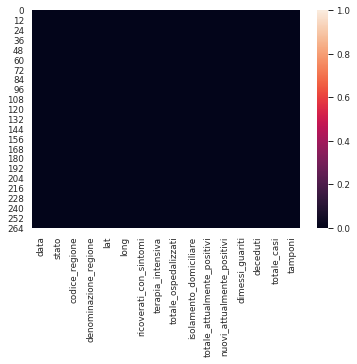

In [6]:
sns.heatmap(data=covidItalyRegioniDataset.isna())

In [7]:
covidItalyRegioniDataset.describe()



codice_regione         lat        long  ricoverati_con_sintomi  \
count      273.000000  273.000000  273.000000              273.000000   
mean        10.190476   43.043374   12.222472               43.710623   
std          5.805707    2.498676    2.658715              179.738721   
min          1.000000   38.109228    7.320149                0.000000   
25%          5.000000   41.125596   11.121231                0.000000   
50%         10.000000   43.616760   12.388247                2.000000   
75%         15.000000   45.434905   13.768136               11.000000   
max         20.000000   46.499335   16.867367             1661.000000   

       terapia_intensiva  totale_ospedalizzati  isolamento_domiciliare  \
count         271.000000            273.000000              273.000000   
mean            9.343173             52.989011               35.032967   
std            38.067050            217.236613               92.550557   
min             0.000000              0.000000                0.000000   
25%             0.000000              0.000000                0.000000   
50%             0.000000              2.000000                2.000000   
75%             2.000000             12.000000               14.000000   
max           359.000000           2020.000000              722.000000   

       totale_attualmente_positivi  nuovi_attualmente_positivi  \
count                   273.000000                  273.000000   
mean                     88.018315                   18.538462   
std                     292.464747                   61.259448   
min                       0.000000                  -17.000000   
25%                       0.000000                    0.000000   
50%                       4.000000                    1.000000   
75%                      26.000000                    9.000000   
max                    2742.000000                  734.000000   

       dimessi_guariti    deceduti  totale_casi       tamponi  
count       273.000000  273.000000   273.000000    273.000000  
mean          8.571429    3.465201   100.054945   1025.098901  
std          51.807011   15.589391   355.648332   2673.820918  
min           0.000000    0.000000     0.000000      0.000000  
25%           0.000000    0.000000     0.000000     20.000000  
50%           0.000000    0.000000     4.000000    114.000000  
75%           0.000000    0.000000    30.000000    437.000000  
max         524.000000  154.000000  3420.000000  15778.000000

### Analisi della matrice di correlazione degli scatter plot
Dall'analisi della matrice di correllazione apprendiamo che solo <font color="red"> codice regione, latidudine, longitudine </font> non hanno correlazione con il fenomeno.
Dalla matrice degli scatterplot invece possiamo visualizzare le varie relazione lineari del fenomeno, per esempio possiamo notare che  <font color="red"> ricoverati_con_sintomi, terapia_intensiva, totale_ospedalizzati</font> sono perfettamenti lineari.



In [8]:
matrixCorrelection = covidItalyRegioniDataset.corr()
matrixCorrelection

codice_regione       lat      long  \
codice_regione                     1.000000 -0.959100  0.652307   
lat                               -0.959100  1.000000 -0.546378   
long                               0.652307 -0.546378  1.000000   
ricoverati_con_sintomi            -0.233259  0.198076 -0.203840   
terapia_intensiva                 -0.252764  0.209380 -0.216687   
totale_ospedalizzati              -0.237183  0.200537 -0.206252   
isolamento_domiciliare            -0.307501  0.283663 -0.205418   
totale_attualmente_positivi       -0.273502  0.238745 -0.218210   
nuovi_attualmente_positivi        -0.265604  0.230080 -0.217501   
dimessi_guariti                   -0.188981  0.149628 -0.171979   
deceduti                          -0.223381  0.191505 -0.193198   
totale_casi                       -0.262233  0.226520 -0.212964   
tamponi                           -0.319854  0.294476 -0.161332   

                             ricoverati_con_sintomi  terapia_intensiva  \
codice_regione                            -0.233259          -0.252764   
lat                                        0.198076           0.209380   
long                                      -0.203840          -0.216687   
ricoverati_con_sintomi                     1.000000           0.986078   
terapia_intensiva                          0.986078           1.000000   
totale_ospedalizzati                       0.999578           0.990491   
isolamento_domiciliare                     0.736311           0.752014   
totale_attualmente_positivi                0.975474           0.973711   
nuovi_attualmente_positivi                 0.878760           0.888355   
dimessi_guariti                            0.963543           0.965850   
deceduti                                   0.995559           0.978389   
totale_casi                                0.986172           0.984305   
tamponi                                    0.703278           0.734398   

                             totale_ospedalizzati  isolamento_domiciliare  \
codice_regione                          -0.237183               -0.307501   
lat                                      0.200537                0.283663   
long                                    -0.206252               -0.205418   
ricoverati_con_sintomi                   0.999578                0.736311   
terapia_intensiva                        0.990491                0.752014   
totale_ospedalizzati                     1.000000                0.740540   
isolamento_domiciliare                   0.740540                1.000000   
totale_attualmente_positivi              0.977126                0.866512   
nuovi_attualmente_positivi               0.882203                0.842132   
dimessi_guariti                          0.965878                0.611256   
deceduti                                 0.994562                0.738942   
totale_casi                              0.987826                0.834001   
tamponi                                  0.710138                0.839597   

                             totale_attualmente_positivi  \
codice_regione                                 -0.273502   
lat                                             0.238745   
long                                           -0.218210   
ricoverati_con_sintomi                          0.975474   
terapia_intensiva                               0.973711   
totale_ospedalizzati                            0.977126   
isolamento_domiciliare                          0.866512   
totale_attualmente_positivi                     1.000000   
nuovi_attualmente_positivi                      0.921778   
dimessi_guariti                                 0.910868   
deceduti                                        0.972581   
totale_casi                                     0.997660   
tamponi                                         0.793171   

                             nuovi_attualmente_positivi  dimessi_guariti  \
codice_regione                                -0.265604  

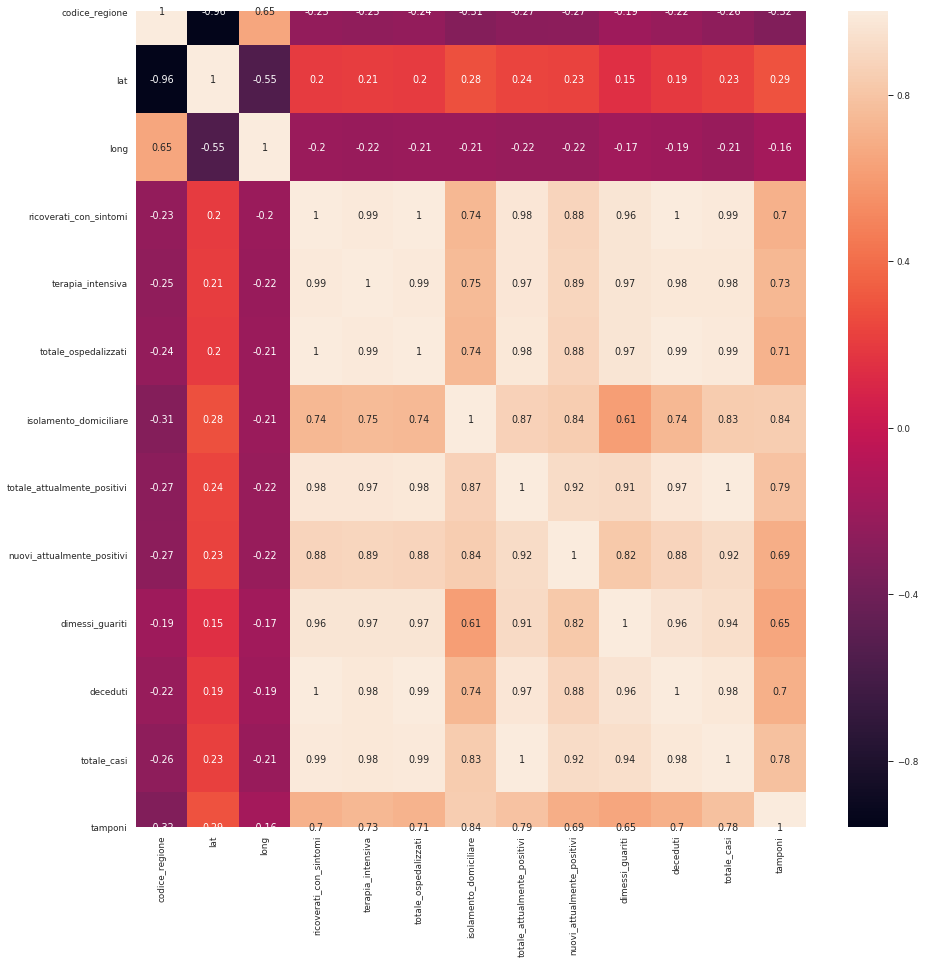

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data=matrixCorrelection, annot=True)

/home/matteo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/matteo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 2160x2160 with 0 Axes>

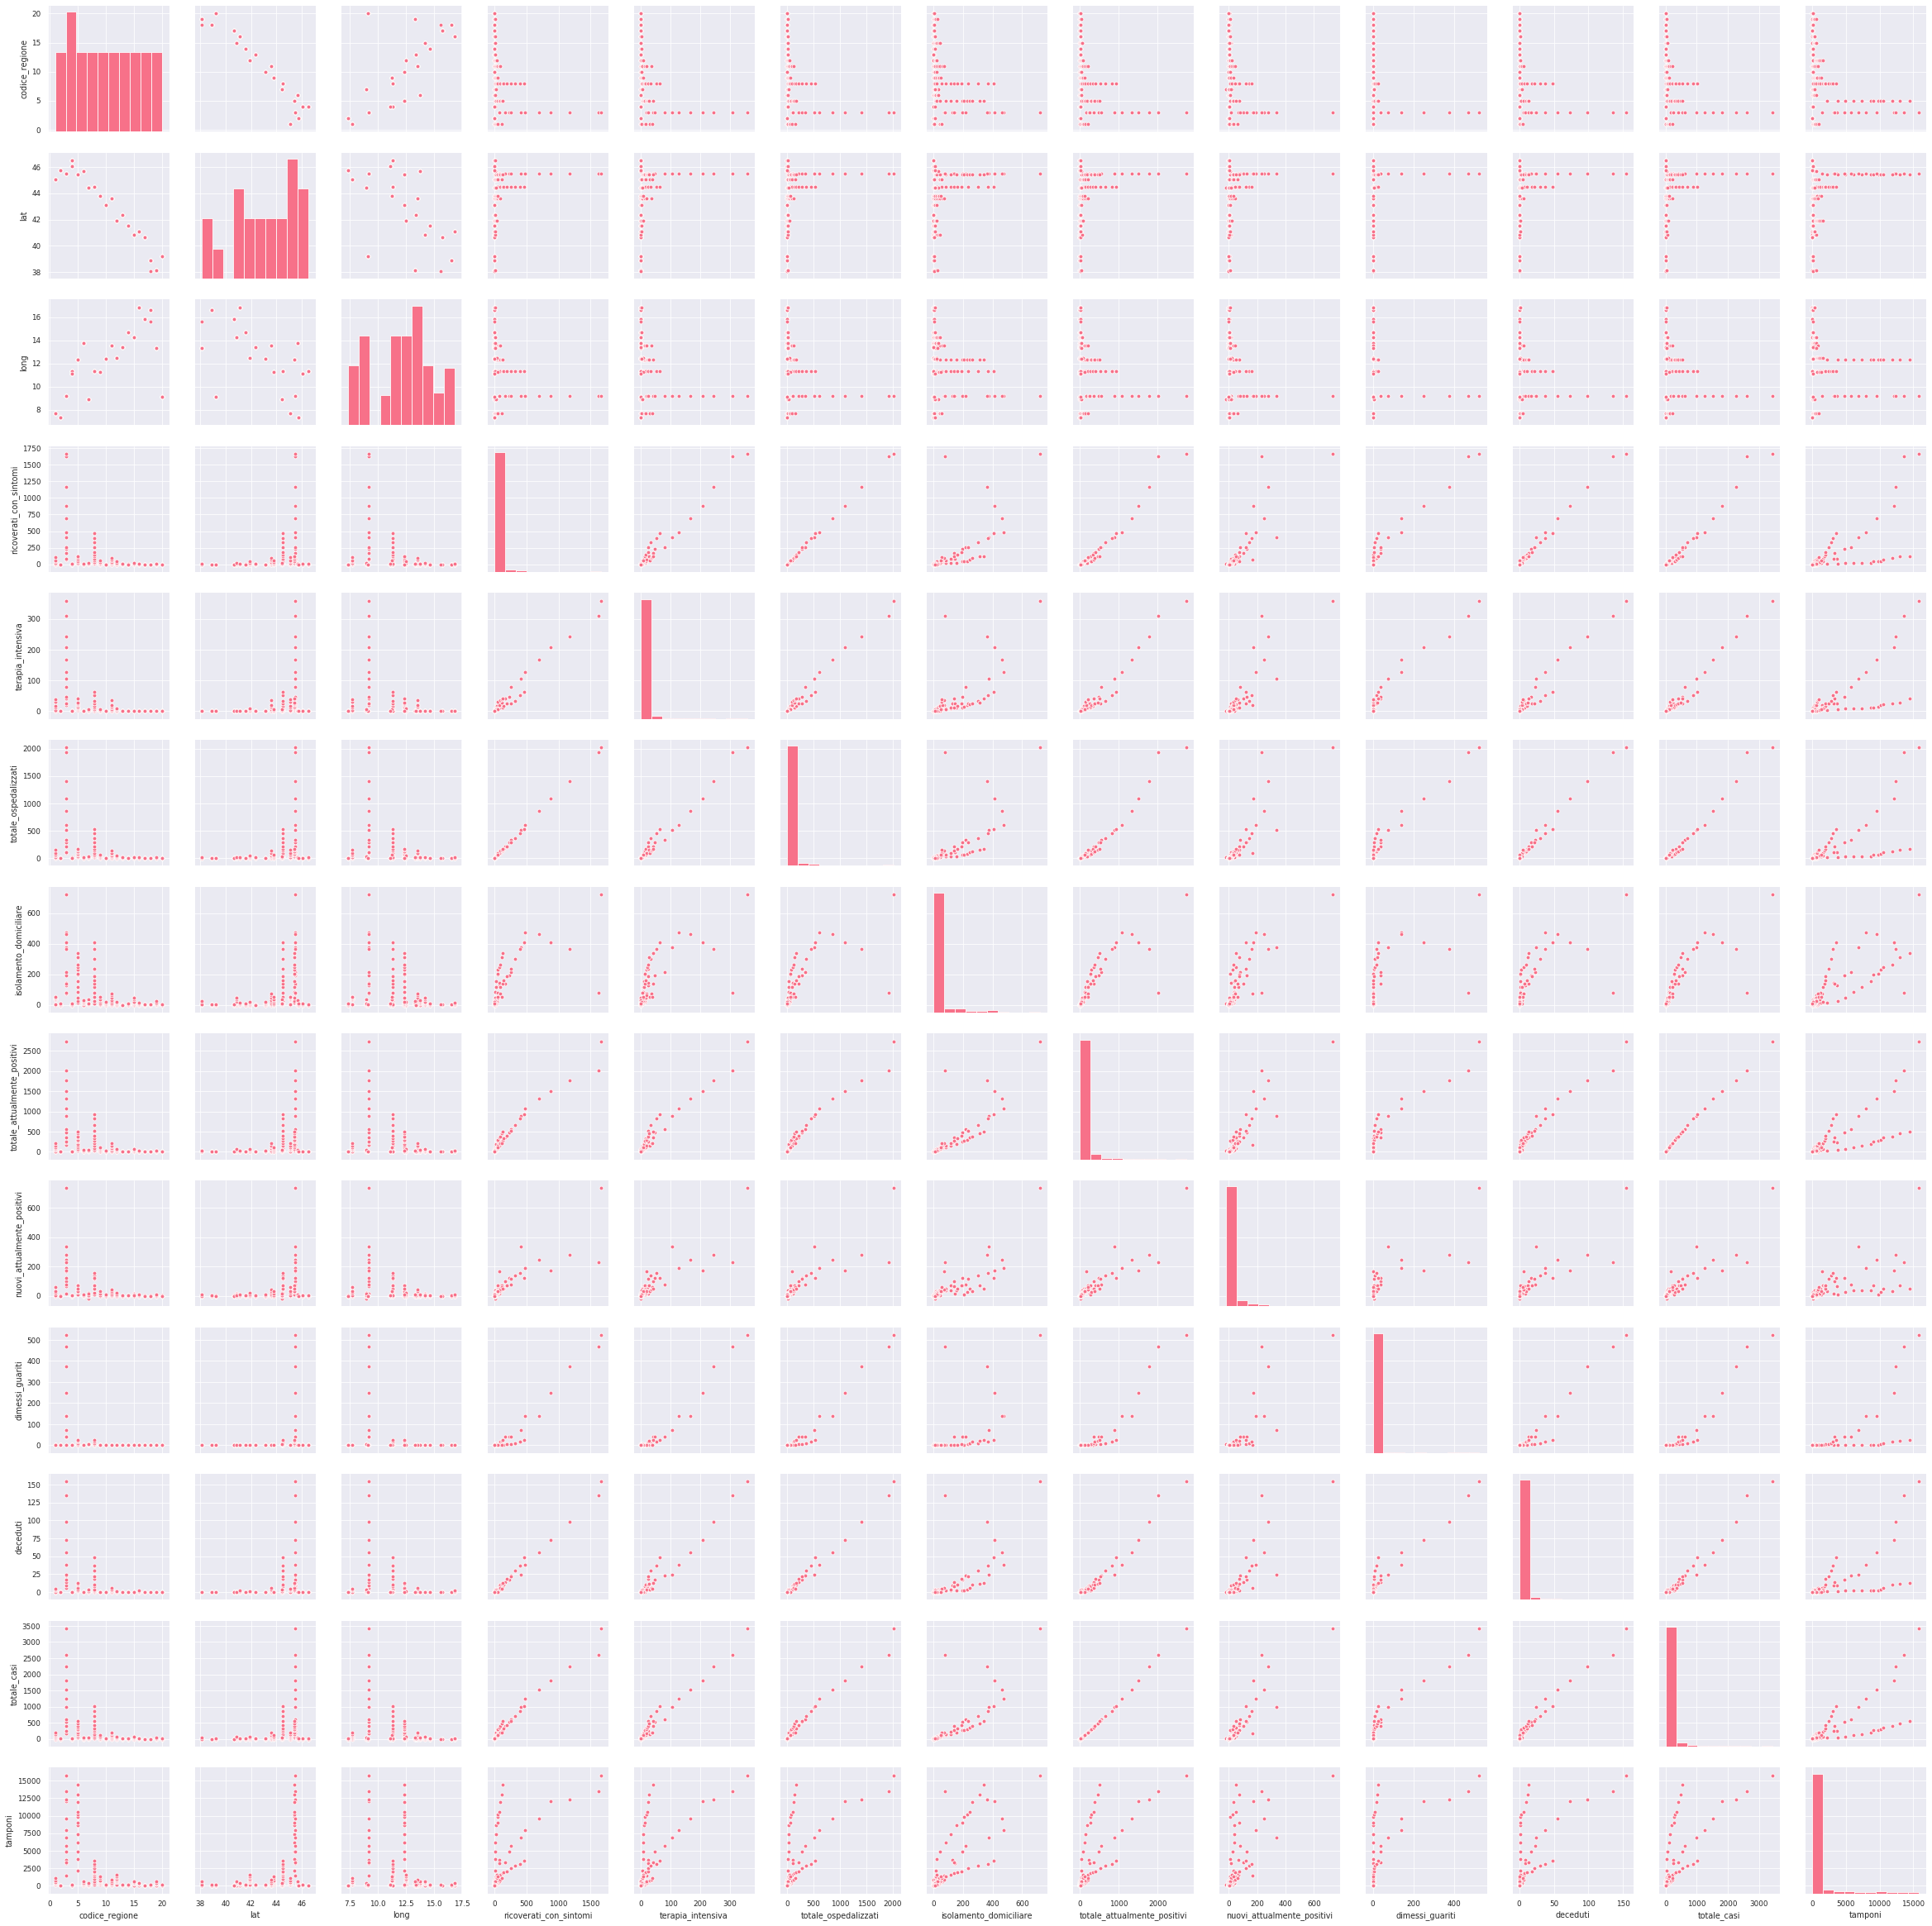

In [10]:
plt.figure(figsize=(30,30))
sns.pairplot(data=covidItalyRegioniDataset)

In [11]:
covidItalyRegioniDataset['data'] = pd.to_datetime(covidItalyRegioniDataset['data'])
covidItalyRegioniDataset.head(20)

data stato  codice_regione  denominazione_regione  \
0  2020-02-24 18:00:00   ITA              13                Abruzzo   
1  2020-02-24 18:00:00   ITA              17             Basilicata   
2  2020-02-24 18:00:00   ITA               4                Bolzano   
3  2020-02-24 18:00:00   ITA              18               Calabria   
4  2020-02-24 18:00:00   ITA              15               Campania   
5  2020-02-24 18:00:00   ITA               8         Emilia Romagna   
6  2020-02-24 18:00:00   ITA               6  Friuli Venezia Giulia   
7  2020-02-24 18:00:00   ITA              12                  Lazio   
8  2020-02-24 18:00:00   ITA               7                Liguria   
9  2020-02-24 18:00:00   ITA               3              Lombardia   
10 2020-02-24 18:00:00   ITA              11                 Marche   
11 2020-02-24 18:00:00   ITA              14                 Molise   
12 2020-02-24 18:00:00   ITA               1               Piemonte   
13 2020-02-24 18:00:00   ITA              16                 Puglia   
14 2020-02-24 18:00:00   ITA              20               Sardegna   
15 2020-02-24 18:00:00   ITA              19                Sicilia   
16 2020-02-24 18:00:00   ITA               9                Toscana   
17 2020-02-24 18:00:00   ITA               4                 Trento   
18 2020-02-24 18:00:00   ITA              10                 Umbria   
19 2020-02-24 18:00:00   ITA               2          Valle d'Aosta   

          lat       long  ricoverati_con_sintomi  terapia_intensiva  \
0   42.351222  13.398438                       0                0.0   
1   40.639471  15.805148                       0                0.0   
2   46.499335  11.356624                       0                0.0   
3   38.905976  16.594402                       0                0.0   
4   40.839566  14.250850                       0                0.0   
5   44.494367  11.341721                      10                2.0   
6   45.649435  13.768136                       0                0.0   
7   41.892770  12.483667                       1                1.0   
8   44.411493   8.932699                       0                0.0   
9   45.466794   9.190347                      76               19.0   
10  43.616760  13.518875                       0                0.0   
11  41.557748  14.659161                       0                0.0   
12  45.073274   7.680687                       2                0.0   
13  41.125596  16.867367                       0                0.0   
14  39.215312   9.110616                       0                0.0   
15  38.115697  13.362357                       0                0.0   
16  43.769231  11.255889                       0                0.0   
17  46.068935  11.121231                       0                0.0   
18  43.106758  12.388247                       0                0.0   
19  45.737503   7.320149                       0                0.0   

    totale_ospedalizzati  isolamento_domiciliare  totale_attualmente_positivi  \
0                      0                       0                            0   
1                      0                       0                            0   
2                      0                       0                            0   
3                      0                       0                            0   
4                      0                       0                            0   
5                     12                       6                           18   
6                      0                       0                            0   
7                      2                       0                            2   
8                      0                       0                            0   
9                     95                      71                          166   
10                     0                       0                            0   
11                     0                       0              

### Esplorazione dei dati con i barplot
>La regione Lombardia è la regione più colpita dal virus Covid19, seguita dall'Emilia Romagna e il Veneto. <br>
In quest'ultima osserviamo che il fenomeno è più contenuto rispetto a Lombardia e Emilia Romagna, infatti il numero 
di casi totali, decessi, isolamenti domiciliari e il resto degli altri fattori in esame è più basso.<br>
Va fatto notare che il <font color="red"> numero di tamponi </font> usati in Veneto è oltre 14000, numero che si avvicina al <font color="red"> numero di tamponi </font>  
fatti dalla Lombardia (oltre 16000) al fronte dei 600 <font color="red"> casi totali </font>.<br>
Pertanto il Veneto è stata la regione più preparata nel gestire il fenomeno tra le tre più colpite. <br>
L'Emilia Romagna non ha numeri paragonabile a quelli della Lombardia dove la situazione è più grave
ma ha numeri che se confronati con quelli del Veneto nei rispettivi indicatori come numeri dei <font color="red"> nuovi_attualmente_positivi, dimessi_guariti,
il totale dei casi ecc... </font>  sono il doppio di quelli del veneto e se guardiamo il <font color="red"> numero di decessi </font> il Veneto ne conta meno
di 20 mentre contro i circa 50 dell'emilia e la <font color="red"> situazione dei guariti </font>  è quasi uguali per le due regioni.<br>
Si può dire quindi che tra le tre regioni più colpite l'Emilia Romagnia sia la regione meno efficiente ha gestire il 
fenomeno.<br>
Per le altre regioni al momento il fenomeno è poco accentuato.


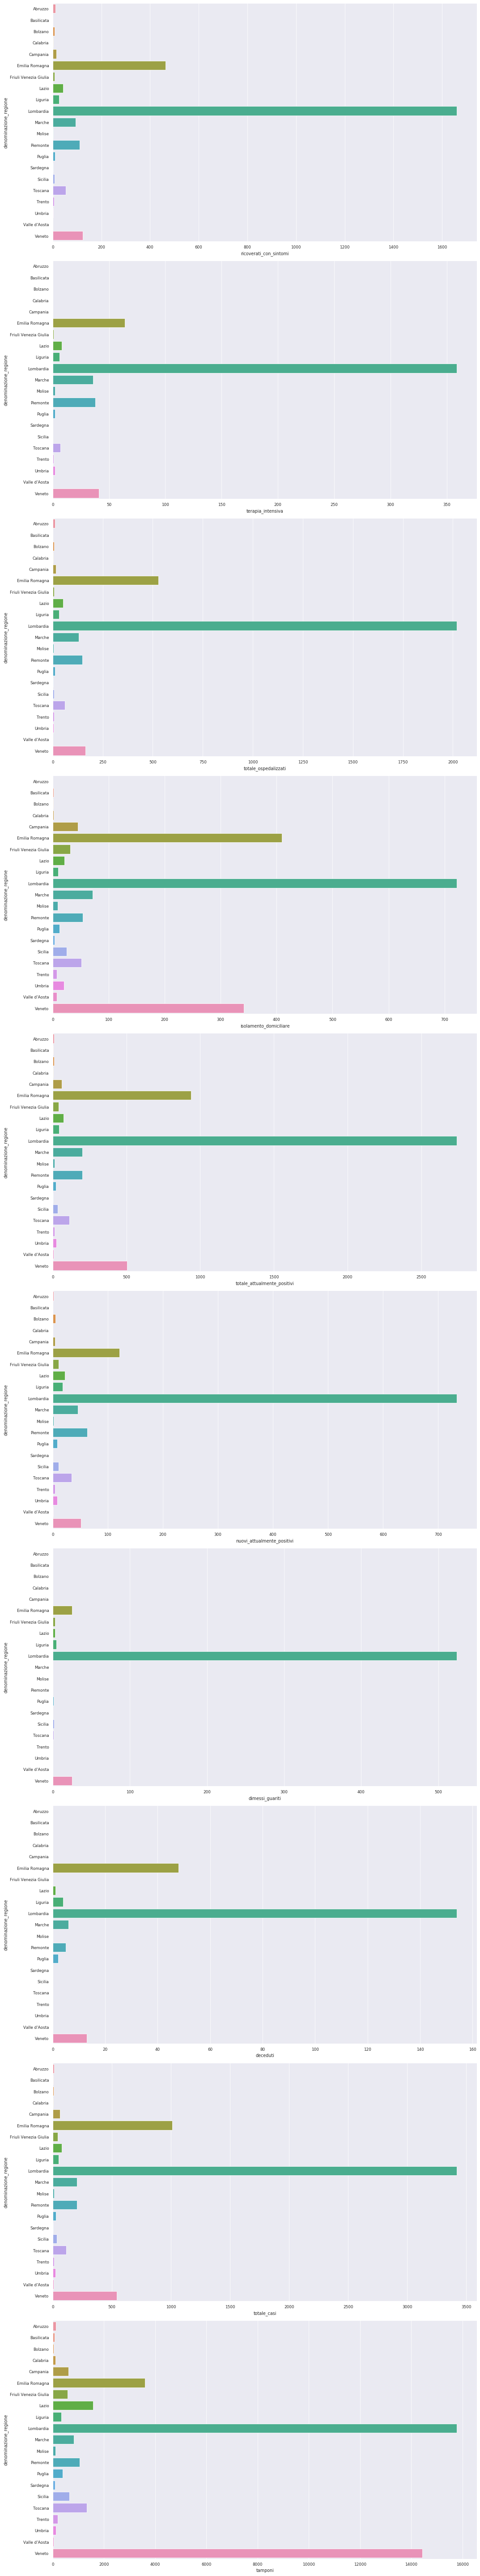

In [12]:
lastDay = covidItalyRegioniDataset['data'].max()
covidUltimoGiorno =covidItalyRegioniDataset[covidItalyRegioniDataset['data']==lastDay]
informationForRegione = ['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare',
              'totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti',
              'deceduti', 'totale_casi', 'tamponi']
fig1, axes1 = plt.subplots(nrows=10,ncols=1, figsize=(15,80))
for i, column in zip(np.arange(10), informationForRegione):
    sns.barplot(x=covidUltimoGiorno[column],y=covidUltimoGiorno['denominazione_regione'],ax=axes1[i])
    fig1.tight_layout()

### Esplorazione dei dati temporali
>Abbiamo visto dai bar plot che le regioni più colpite sono Lombardia, Emilia Romagna e Veneto.<br>
Ora faremo un'analisi esplorativa usando il tempo per vedere come il fenomeno si evoluto in queste regioni sotto i
vari indicatori presi in analisi.<br>
Cominciamo dalla Lombardia, come possiamo vedere l'andamento dei <font color="red"> ricoveri_con_sintomi,
terapia_intensiva e totali_ospedalizzati </font> hanno un andamento crescente molto veloce e simile tra di loro,
questo perchè i tre indicatori sono altamente correllati tra loro (<font color="green"> si guardi la matrice di
di correlazione e degli scatterplot</font>) quindi questi indicatori danno la stessa informazione. <br>
E'interresante notare che tra il 2020-03-05 e il 2020-03-06 gli <font color="red"> isolamenti_domiciliari </font> 
passano da 400 persone all'isolamento domiciliare a 100 persone all'isolamento domiciliare per poi risalire a 700 il 2020-03-07.
Per quanto riguarda gli altri fattori in analisi come <font color="red"> tamponi, dimessi_guariti, decessi,casi_totali ecc.. </font> crescescono tutti a velocità 
diverse.<br>
Guardando il grafico temporale riepilogativo della regione Lombardia fino al 2020-03-07 è evidente l'epidemia ha fatto  crescere nelle diverse misure tutti questi indicatori allo scorrere del tempo; lo stesso vale per l'Emilia Romagnia, <br>
Il Veneto come detto nella precedente analisi è la regione più preparata ed infatti l'analisi temporale (fino al 2020-03-07) conferma il fatto, in quanto in tutte le dimensioni di analisi si vede un andamento crescente ma rispetto a Lombardia e Emilia Romagna questo è più regolare, più lento.<br>
Gli alti grafici mettono in confronto Lombardia, Veneto e Emilia Romagna, quello finale confronta tutte le regioni Italiane.

/home/matteo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


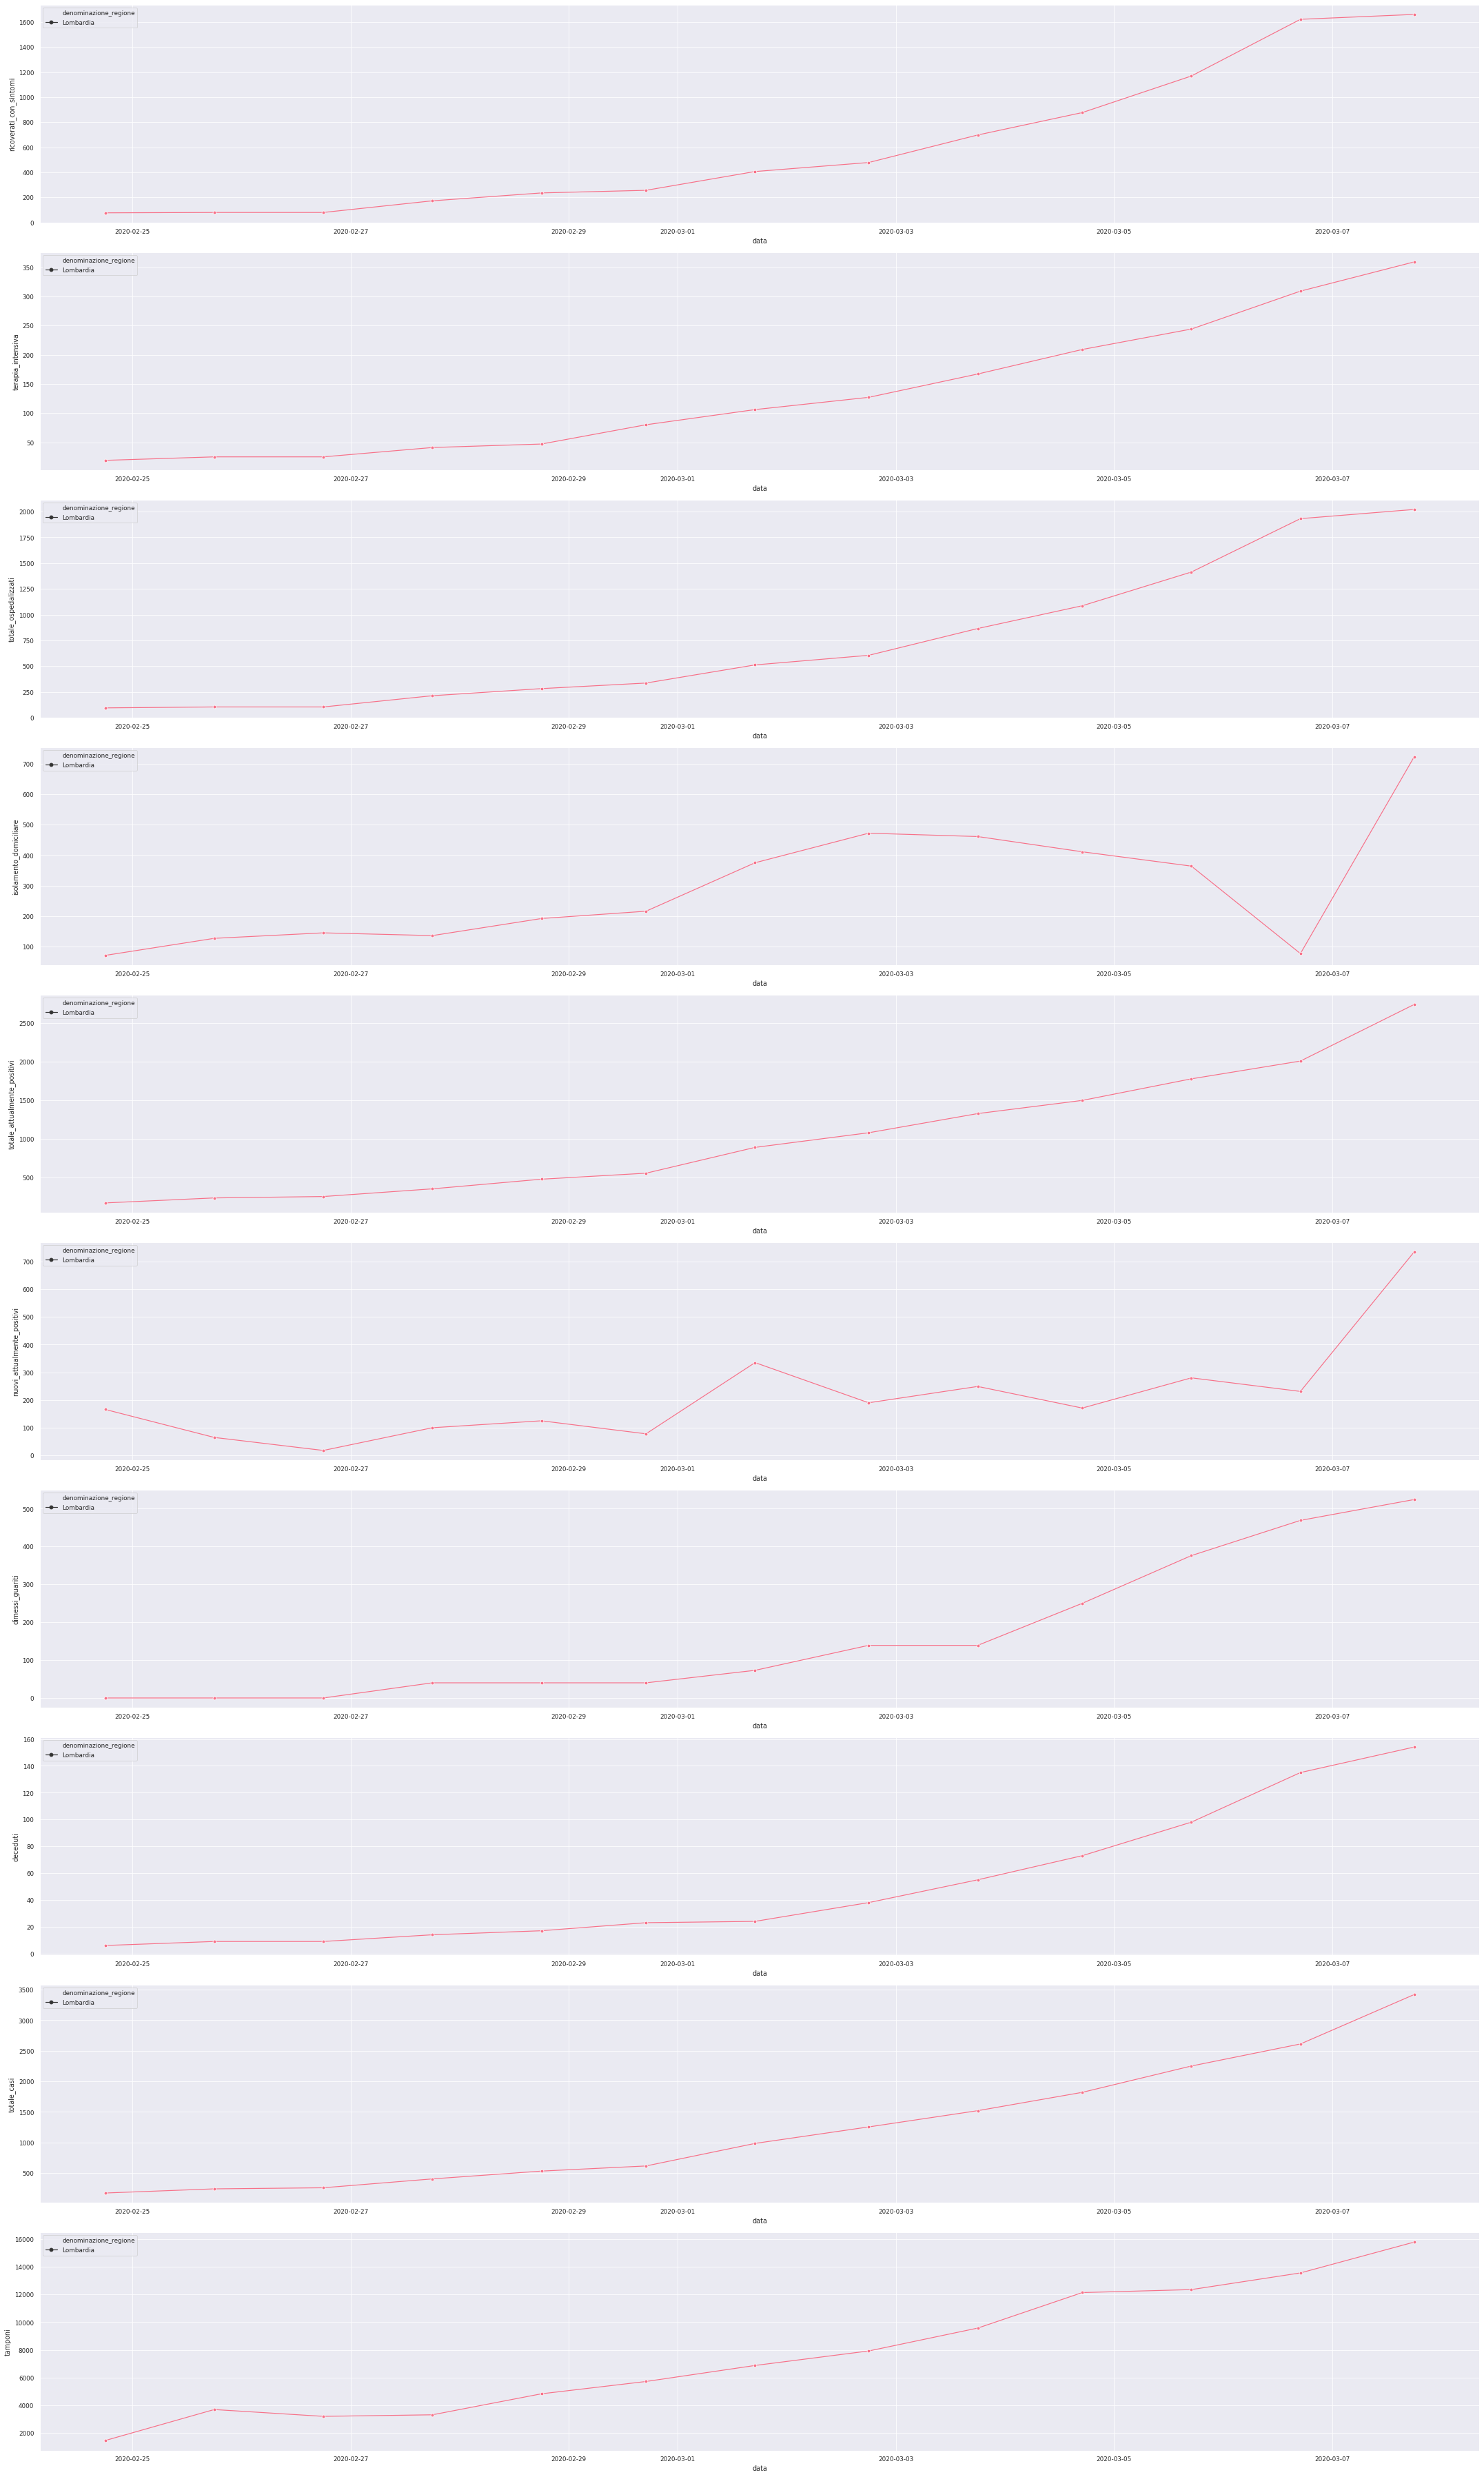

In [13]:
lombardyCase = covidItalyRegioniDataset[covidItalyRegioniDataset['denominazione_regione']=='Lombardia']
fig2, axis2 = plt.subplots(nrows=10,ncols=1, figsize=(30,50))
for i, column in zip(np.arange(10), informationForRegione):
    sns.lineplot(x='data', y=column, markers=True,style='denominazione_regione', data = lombardyCase, ax = axis2[i])
    fig2.tight_layout()

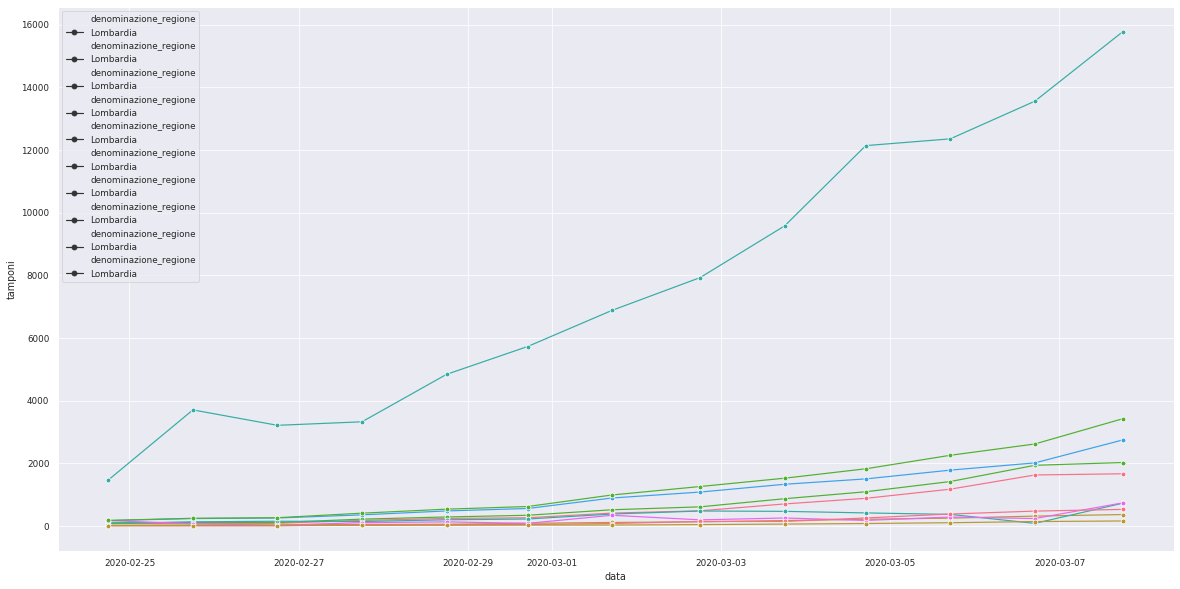

In [14]:
plt.figure(figsize=(20,10))
for column in informationForRegione:
    sns.lineplot(x='data', y=column, style='denominazione_regione', markers=True, data = lombardyCase)

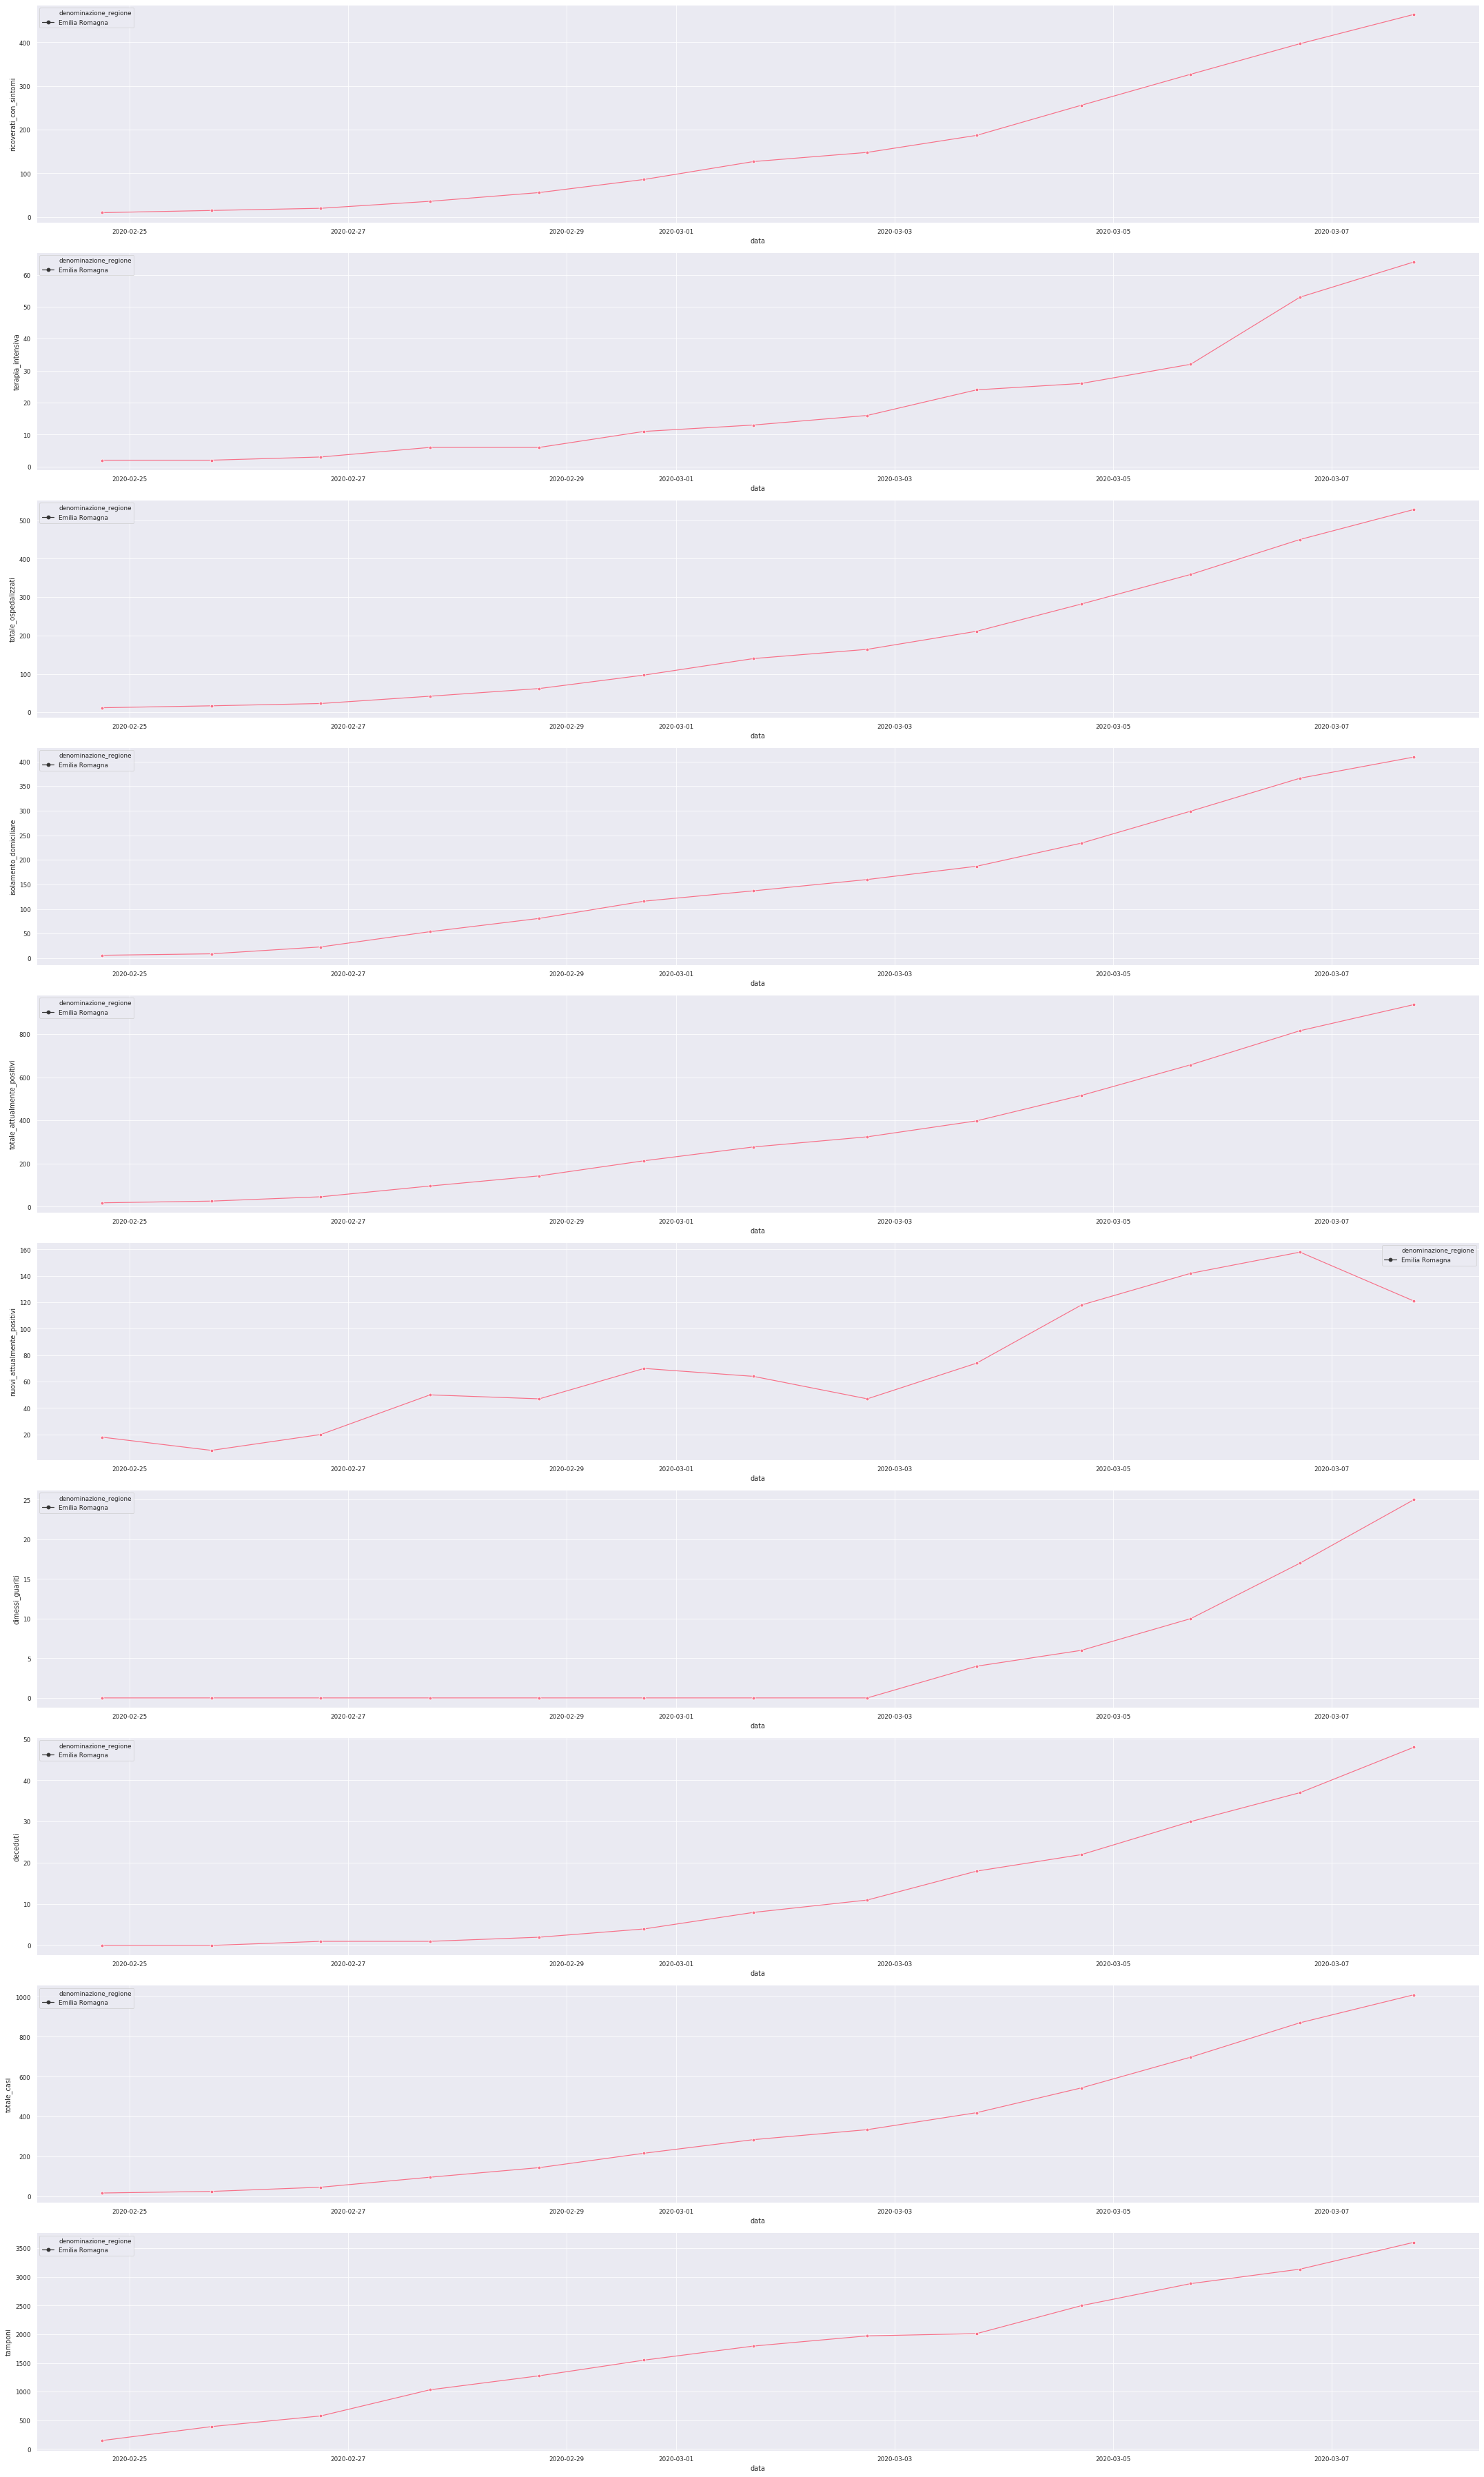

In [15]:
emiliaCase = covidItalyRegioniDataset[covidItalyRegioniDataset['denominazione_regione']=='Emilia Romagna']
fig3, axis3 = plt.subplots(nrows=10,ncols=1, figsize=(30,50))
for i, column in zip(np.arange(10), informationForRegione):
    sns.lineplot(x='data', y=column, markers=True,style='denominazione_regione', data = emiliaCase, ax = axis3[i])
    fig3.tight_layout()

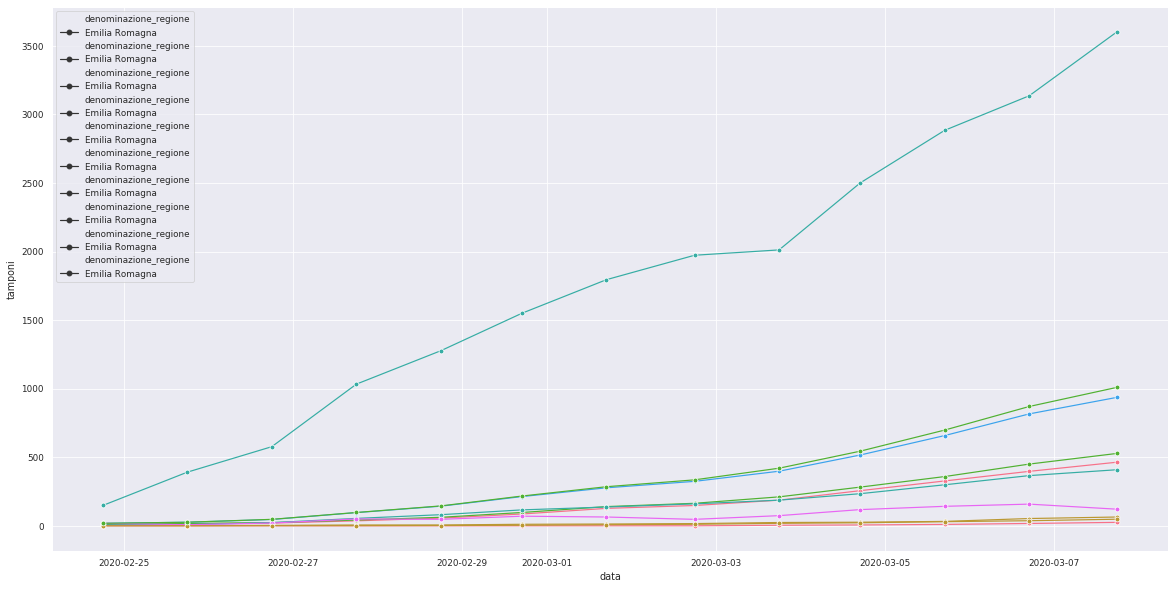

In [16]:
plt.figure(figsize=(20,10))
for column in informationForRegione:
    sns.lineplot(x='data', y=column, markers=True,style='denominazione_regione', data = emiliaCase)

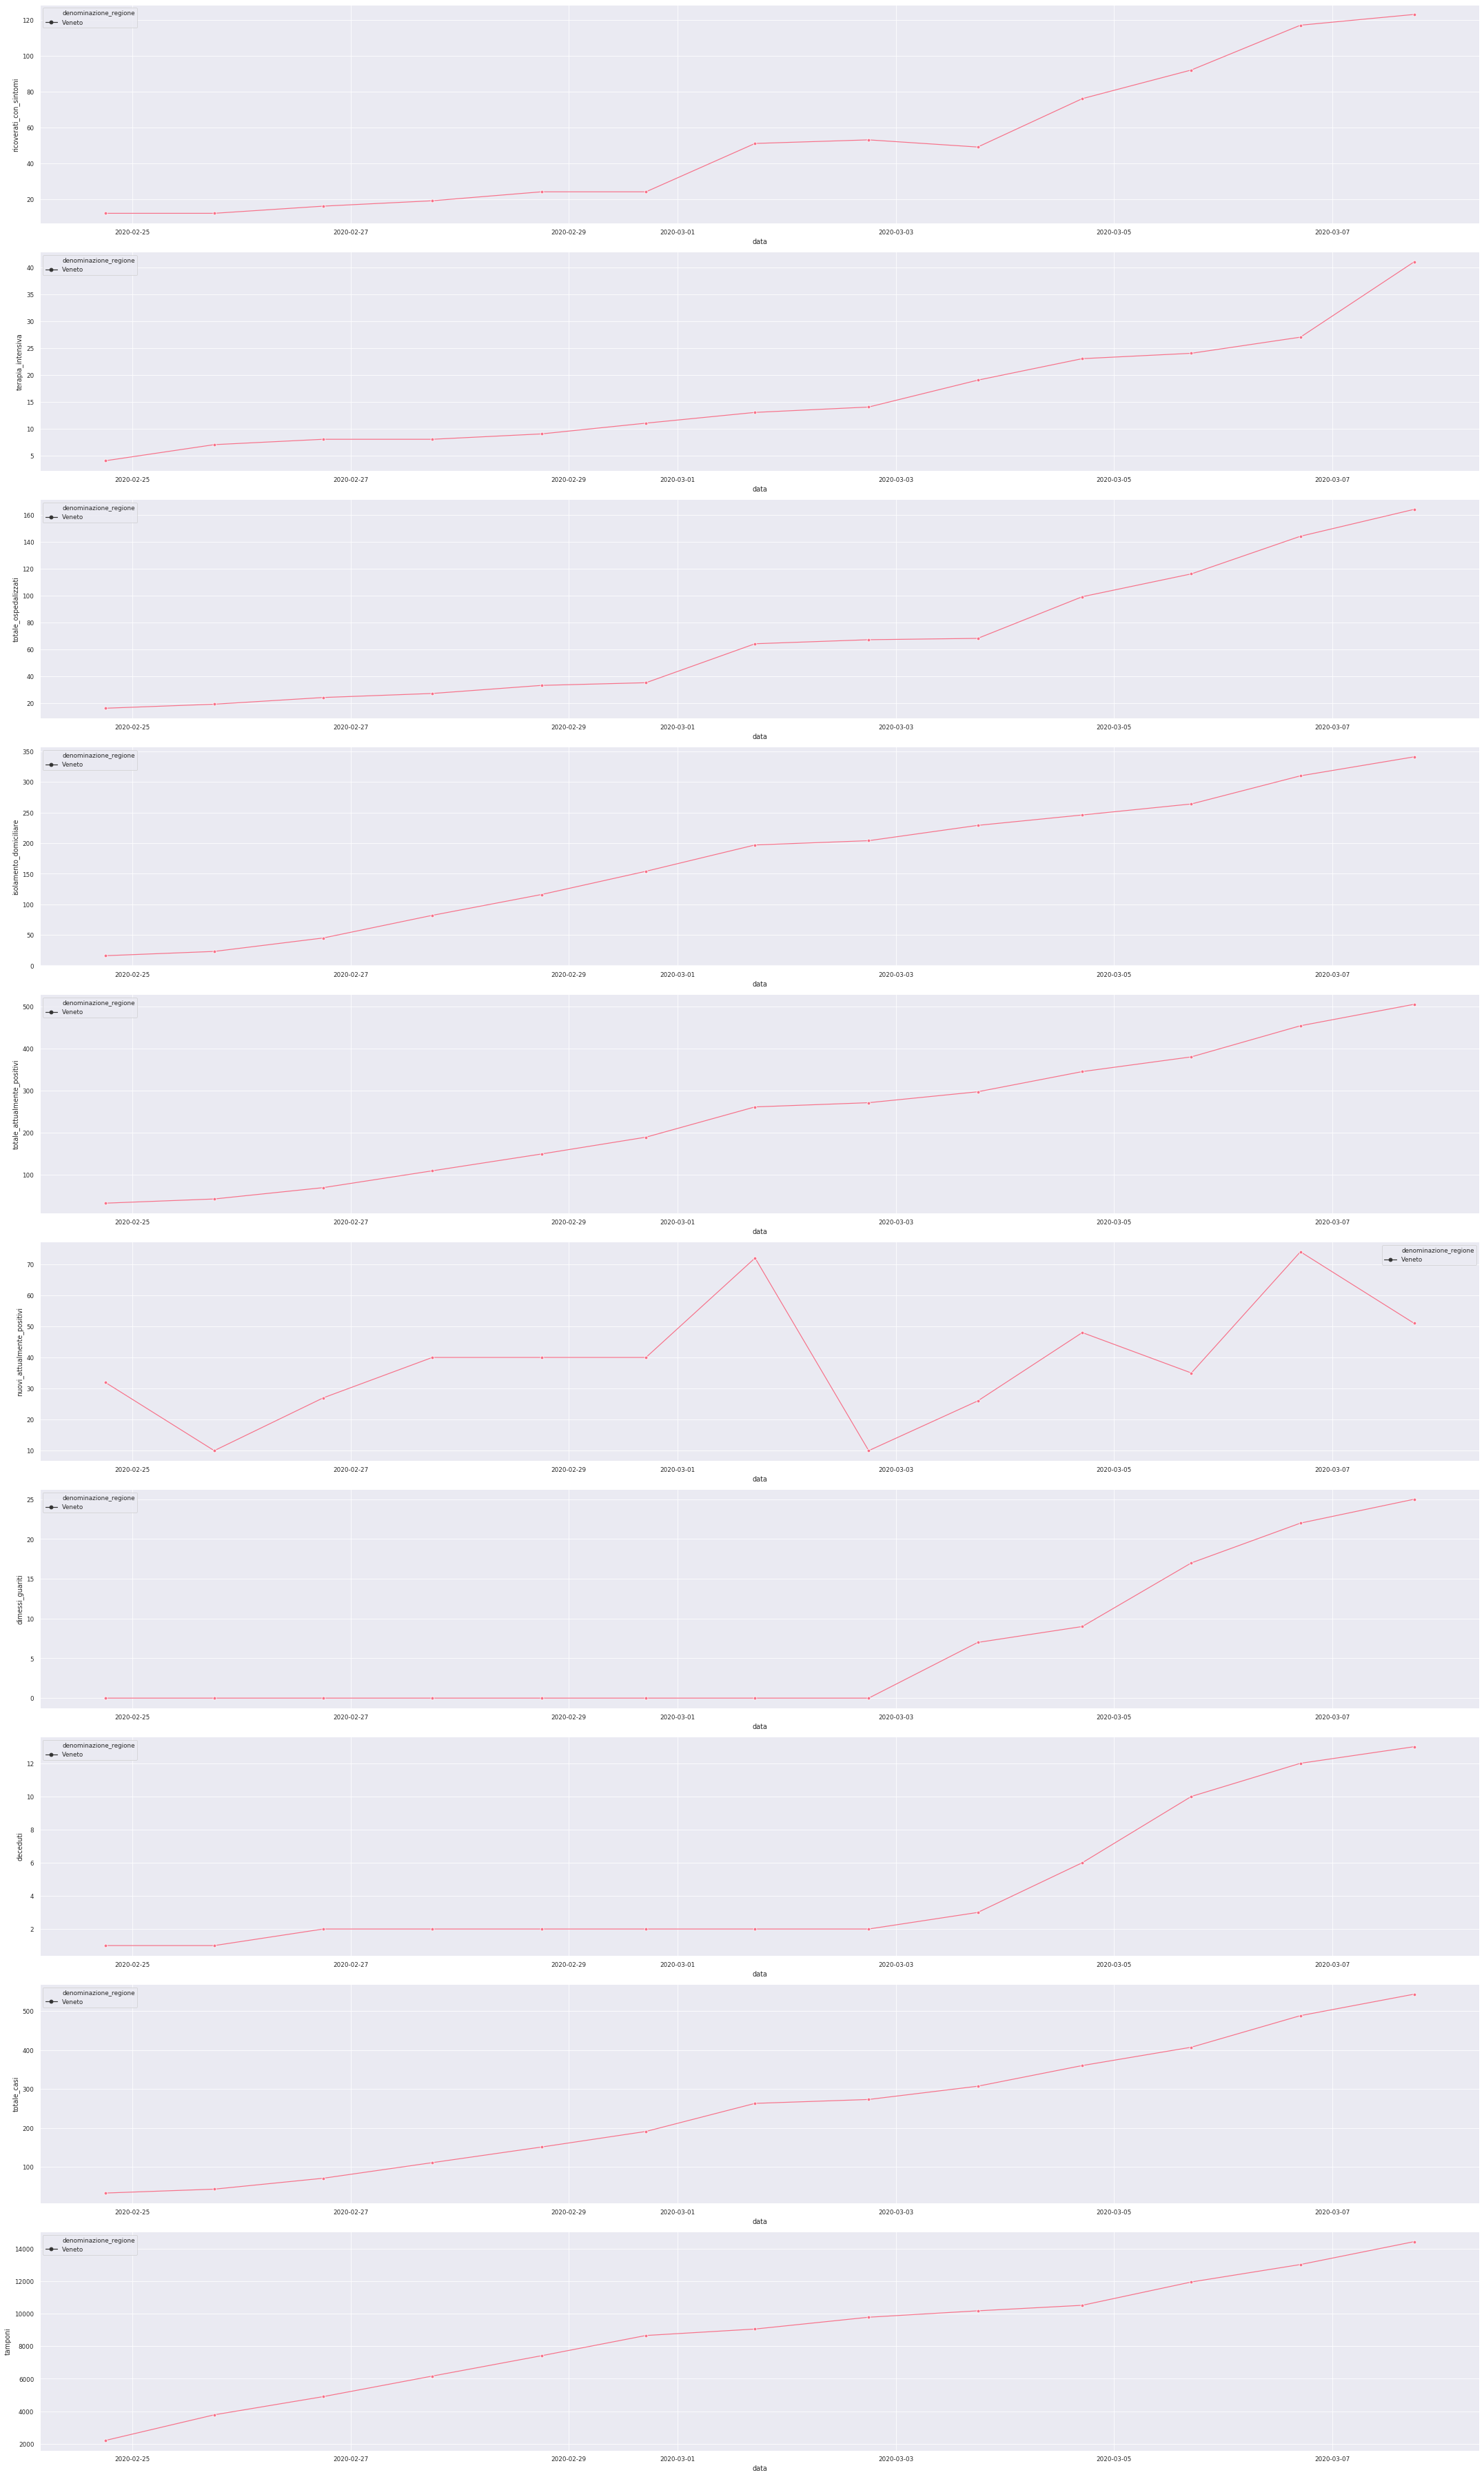

In [17]:
venetoCase = covidItalyRegioniDataset[covidItalyRegioniDataset['denominazione_regione']=='Veneto']
fig4, axis4 = plt.subplots(nrows=10,ncols=1, figsize=(30,50))
for i, column in zip(np.arange(10), informationForRegione):
    sns.lineplot(x='data', y=column, markers=True, style='denominazione_regione',data = venetoCase, ax = axis4[i])
    fig4.tight_layout()

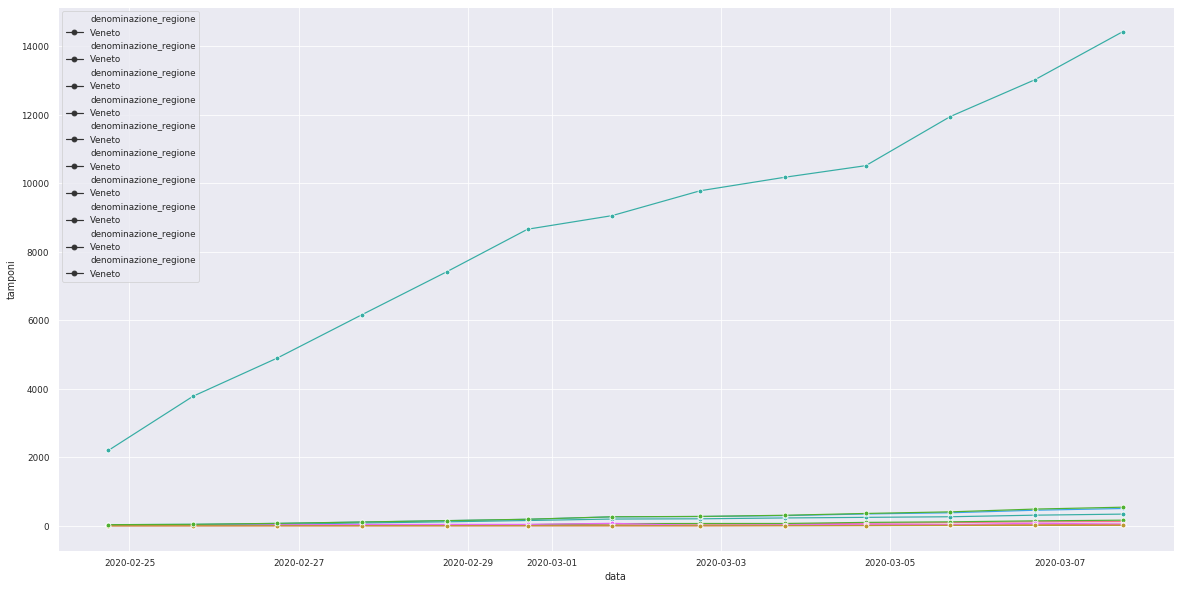

In [18]:
plt.figure(figsize=(20,10))
for column in informationForRegione:
    sns.lineplot(x='data', y=column, markers=True, style='denominazione_regione', data = venetoCase)

In [19]:
whereCondition = (covidItalyRegioniDataset['denominazione_regione']=='Lombardia')|(covidItalyRegioniDataset['denominazione_regione']=='Veneto')|\
(covidItalyRegioniDataset['denominazione_regione']=='Emilia Romagna')
comparisonLVE = covidItalyRegioniDataset[whereCondition]

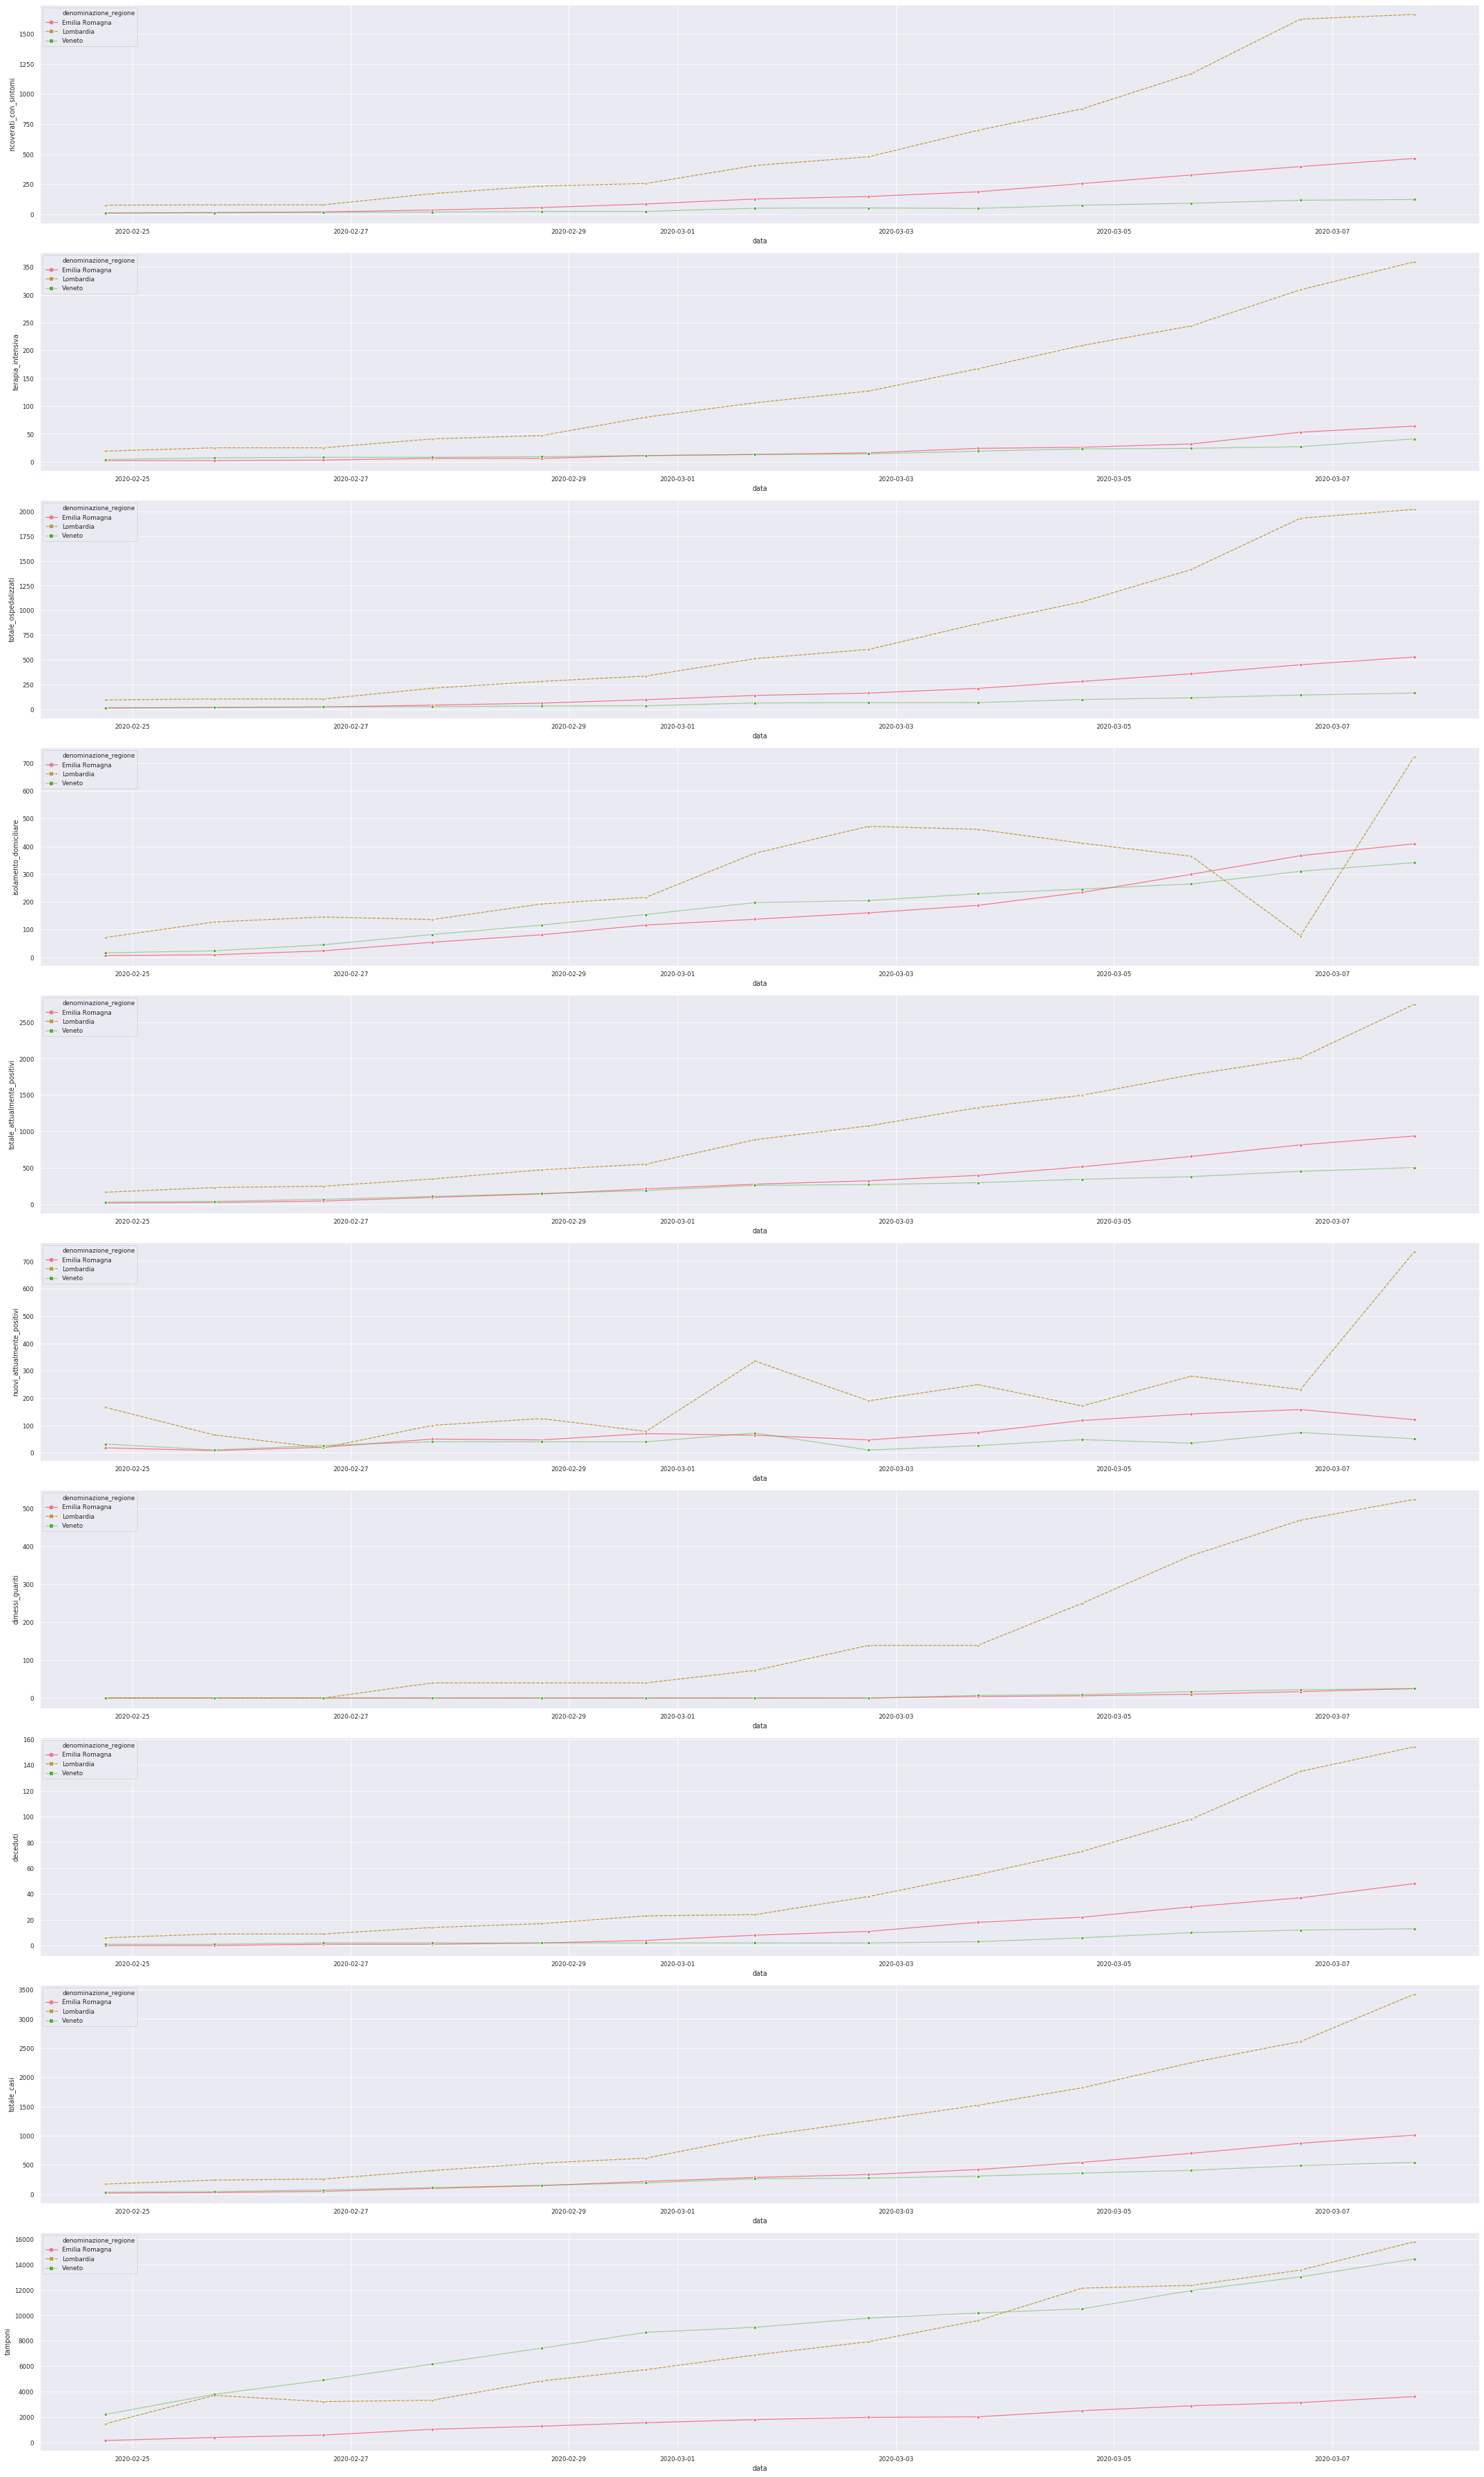

In [20]:
fig5, axis5 = plt.subplots(nrows=10,ncols=1, figsize=(30,50))
for i, column in zip(np.arange(10), informationForRegione):
    sns.lineplot(x='data', y=column, markers=True, style='denominazione_regione', hue='denominazione_regione', data = comparisonLVE, ax = axis5[i])
    fig5.tight_layout()

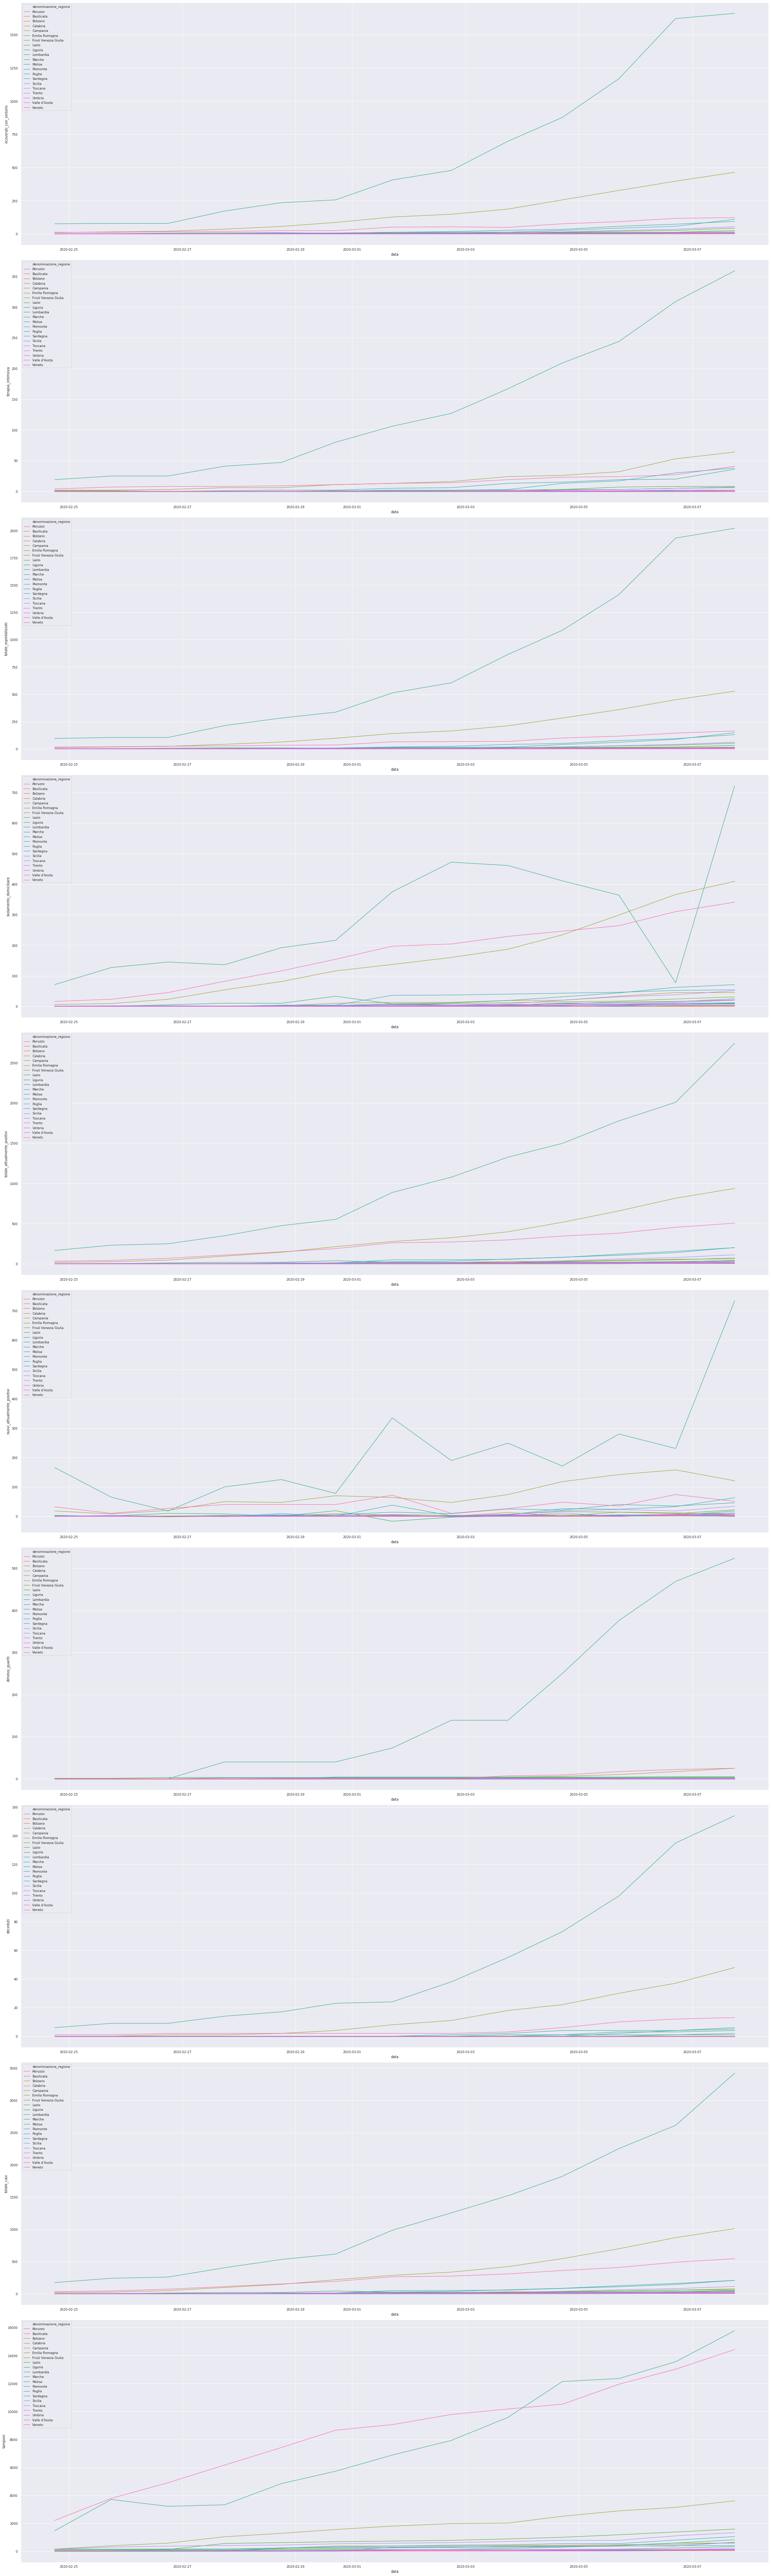

In [21]:
fig6, axis6 = plt.subplots(nrows=10,ncols=1, figsize=(30,100))
for i, column in zip(np.arange(10), informationForRegione):
    sns.lineplot(x='data', y=column, hue='denominazione_regione', data = covidItalyRegioniDataset, ax = axis6[i])
    fig6.tight_layout()



### Analisi dei dati con il modello ARIMA
>Adesso vediamo di costruire un modello per analizzare a modino le nostre serie temporali.<br>
Vogliamo capire come si evolvera la situazione dei <font color = "red">totale_ospedalizzati </font> che ricordiamo tale variabile include
le persone ricoverate in ospedale con i sintomi e quelle gravemente malate da finire in terapia intensiva.<br>
Lo faremo per la sola regione <font color = "green"> Lombardia </font> perchè è quella con più rilevazioni essendo la più colpita dal Covid19.<br>
Per fare la nostra analisi useremo il modello stocastico ARIMA (modello autoregressivo integrato a media mobile) tale modello è definito come: 
$$(1- \sum_{k=1}^{p}\alpha_{k}L^{k})(1-L)^{d}X_{t}=(1+\sum_{k=1}^{q}\beta_{k}L^{k})\epsilon_{t}$$
dove:
* $\epsilon_{t}$ è l'errore
* p è l'ordine della parte autoregressiva del modello
* q è l'ordine della parte media mobile del modello
* L è l'operatore di lag <br>

Utilizzeremo il modello ARIMA in quest'ordine:
<ol>
<li>Visualizzazione della serie temporale</li>
<li>Controllo della stazionarietà con il test Dickey-Fullert ed eventuale trasformazione di stazionarietà</li>
<li>Plotting dei grafici di autocorrelazione e autocorrelazione parziale</li>
<li>Generazione del modello ARIMA attraverso grid search </li>
<li>Analisi del modello</li> 
<li>Previsione</li> 
</ol>
Perchè ci interessa la stazionarità e l'autocorrelazione?<br>
Una serie temporale stazionaria è più facile da analizzare e prevedere in quanto si può assumere che le propietà statistiche future
della serie temporale saranno uguali a quelle attuali.<br>
Molte serie temporali non sono stazionarie ma esistono dei metodi che ci permettono di trasformare una serie temporale non stazionaria in una
stazionaria.<br>
L'autocorrelazione ci interessa perchè se ignorata ci porta a conclusione errate sull'impatto delle variabili del nostro modello.

In [22]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
#from pyramid.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller, kpss

In [23]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax) # disegna la time series
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5) #mostra l'autocorrelazione
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) #mostra l'autocorrelazione parziale
        sm.qqplot(y, line='s', ax=qq_ax) #mostra il qq-plot
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax) #mostra il probability plot

        plt.tight_layout()
    return

In [24]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()
    #df.rolling(2).sum()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.to_numpy(), color='blue',label='Original')
    mean = plt.plot(rolmean.to_numpy(), color='red', label='Rolling Mean')
    std = plt.plot(rolstd.to_numpy(), color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

In [25]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

Per prima cosa settiamo l'indice del nostro dataframe <font color="red">covidItalyRegioniDataset</font> in modo che sia la variabile <font color="red">data</font>, questo ci permetterà di osservare secondo il tempo le nostre variabili.<br>
Dal dataframe estraiamo i <font color="red">totali_ospedalizzati della Lombardia</font>, questa sarà la nostra serie temporale.


In [26]:
covidItalyRegioniDataset.set_index(["data"], inplace = True, 
                            append = True, drop = False) 
totale_ospedalizzati = covidItalyRegioniDataset['totale_ospedalizzati']

In [27]:
#otale_ospedalizzati_lombardia_query = covidItalyRegioniDataset[['totale_ospedalizzati','denominazione_regione']=="Lombardia"]]
totale_ospedalizzati_lombardia = covidItalyRegioniDataset[covidItalyRegioniDataset['denominazione_regione']=="Lombardia"]['totale_ospedalizzati']

Adesso plottiamo la serie temporale, la scopporemo nelle componenti di trend, stagionalità e residuo per creare un modello moltiplicativo e addattivo.

Come possiamo vedere da entrambe le decomposizioni c'è un trend non lineare (quasi esponenziale) nella serie storica e non vi è stagionalità nel fenomeno.

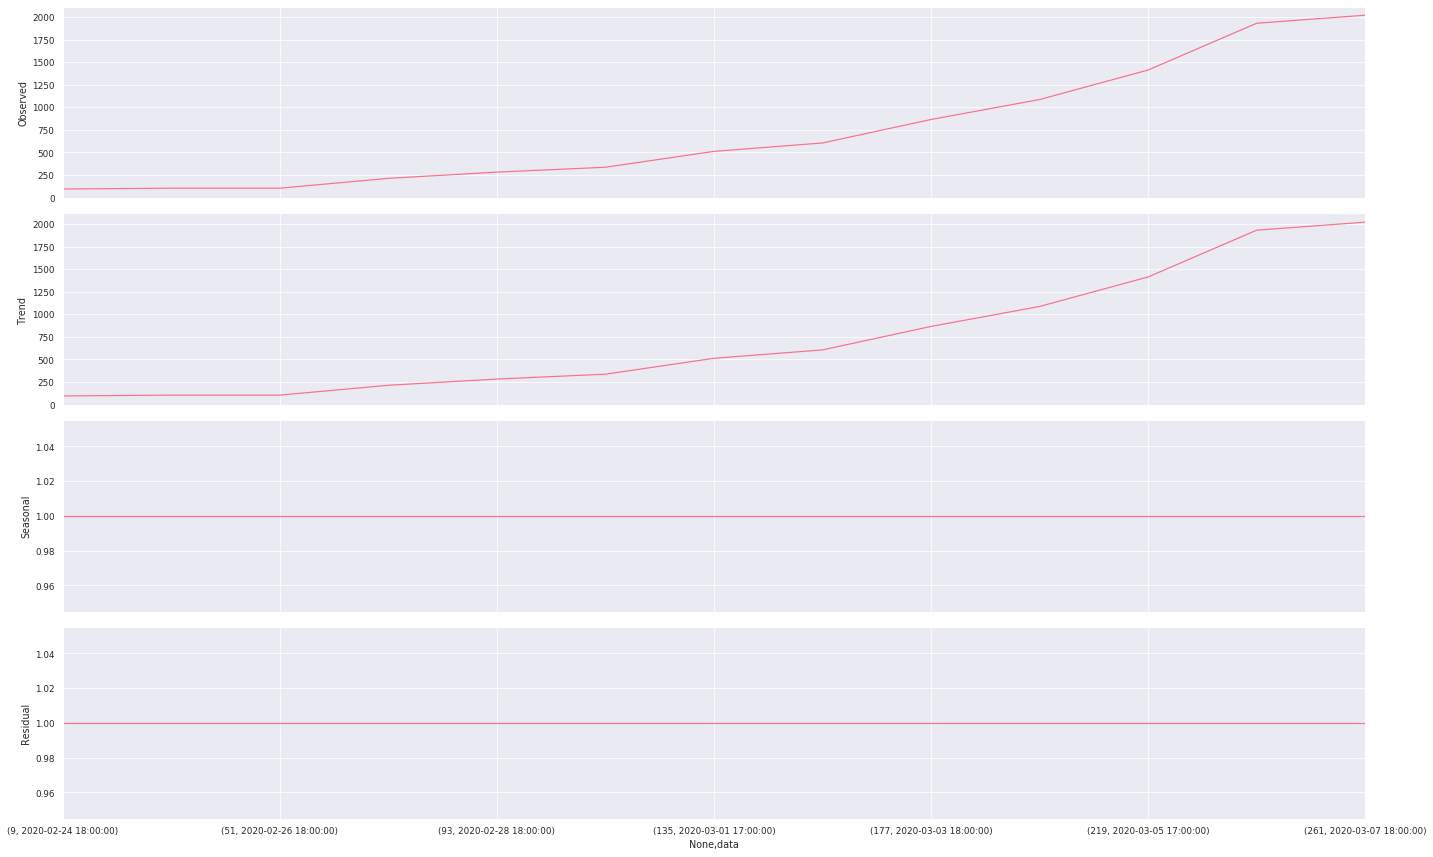

In [28]:
rcParams['figure.figsize'] = 20, 12
decomposition_multiplicative = sm.tsa.seasonal_decompose(totale_ospedalizzati_lombardia, model='multiplicative', filt=None, two_sided=True, freq=1) # freq=1
fig = decomposition_multiplicative.plot()
#plt.show()

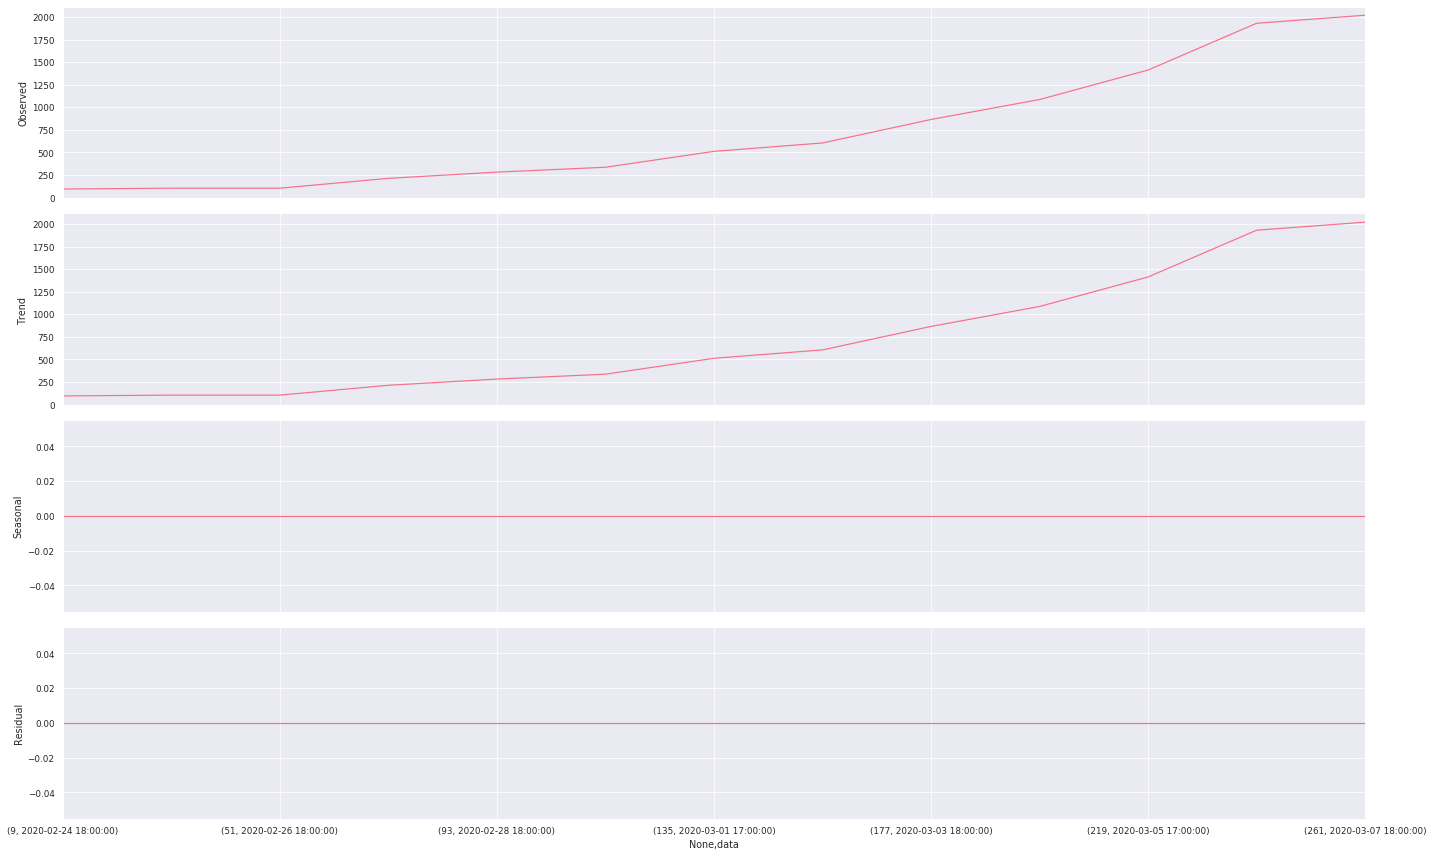

In [29]:
rcParams['figure.figsize'] = 20, 12
decomposition_additive = sm.tsa.seasonal_decompose(totale_ospedalizzati_lombardia, model='additive', filt=None, two_sided=True, freq=1) # freq=1
fig = decomposition_additive.plot()

Adesso dobbiamo verificare la stazionarietà della nostra serie temporale (che sappiamo già non esserlo, basta guardarla!) con il <font color="red">test di Dickey-Fuller</font>, tale test è formulato come segue:
* H0: la serie temporale ha una radice unitaria
* H1: la serie temporale non ha una radice unitaria<br>
Se non riusciamo a respingere H0 (p-value più grande di 0.05) possiamo dire che la serie temporale è non stazionaria e quindi la nostra serie potrebbe essere lineare 
che la nostra serie temporale ha una radice unitaria (ciò significa che la nostra serie temporale è non stazionaria), il p-value associato al test è 0.99, pertanto concludiamo che la nostra serie ha
una radice unitaria, dobbiamo renderla stazionaria. <br>
Se non riusciamo a respingere l'ipotesi nulla, possiamo dire che la serie non è stazionaria e che possiamo renderla stazionaria applicando delle differenze regolari e attraverso una trasformazione logaritmica.
Un altro test utile è il <font color="red">test di Kwiatkowski-Phillips-Schmidt-Shin</font> che è il complementare del test di DIckey-Fuller infatti questo test è definito come:
* H0: la serie temporale è stazionaria
* H1: la serie temporale non è stazionaria<br>
Come detto è il complementare del test di Dickey-Fuller quindi se non riusciamo a respingere H0 (p-value più grande di 0.05) possiamo dire che la serie temporale è stazionaria e quindi non dovremmo fare nulla
che la nostra serie temporale ha una radice unitaria (ciò significa che la nostra serie temporale è non stazionaria), il p-value associato al test è 0.99, pertanto concludiamo che la nostra serie ha
una radice unitaria, dobbiamo renderla stazionaria. <br>
Abbiamo fatto diversi tentativi per rendere stazionaria la serie temporale, il miglior risultato si è ottenuto con una differenza regolare del secondo ordine definita nel seguente modo:
$$\Delta^{2}x_t= x_{t}-2x_{t-1}+x_{t-2}$$
Abbiamo cominciato con la serie temporale senza trasformazioni plottando la sua media mobile e la sua standard deviation

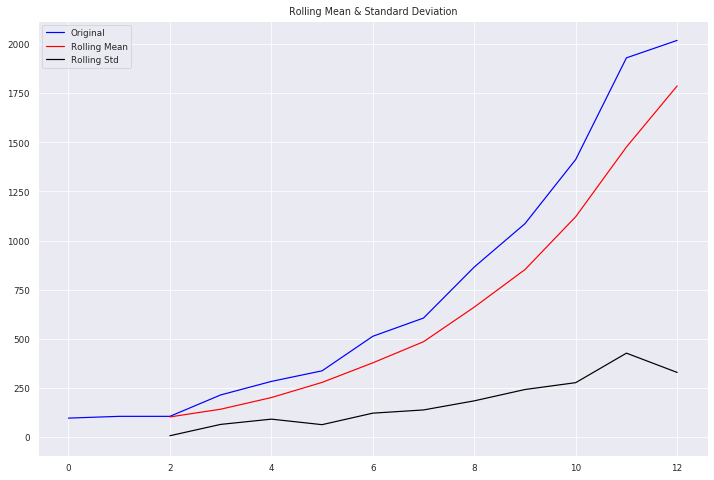

Results of Dickey-Fuller Test:
Test Statistic                 2.130615
p-value                        0.998820
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64
Results of KPSS Test:
Test Statistic           0.379750
p-value                  0.085884
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [30]:
test_stationarity(totale_ospedalizzati_lombardia)
kpss_test(totale_ospedalizzati_lombardia)

$$\Delta^{2}x_t= x_{t}-2x_{t-1}+x_{t-2}$$
Come possiamo vedere il test di Dickey-Fuller Test ha un p-value di 0.000029 quindi la nostra serie non ha una radice unitaria mentre per il test di Kwiatkowski-Phillips-Schmidt-Shin il p-value associato è 0.076197.
Al fine di rendere stazionaria la serie temporale basta che il Dickey-Fuller Test rigetti la sua ipotesi nulla.

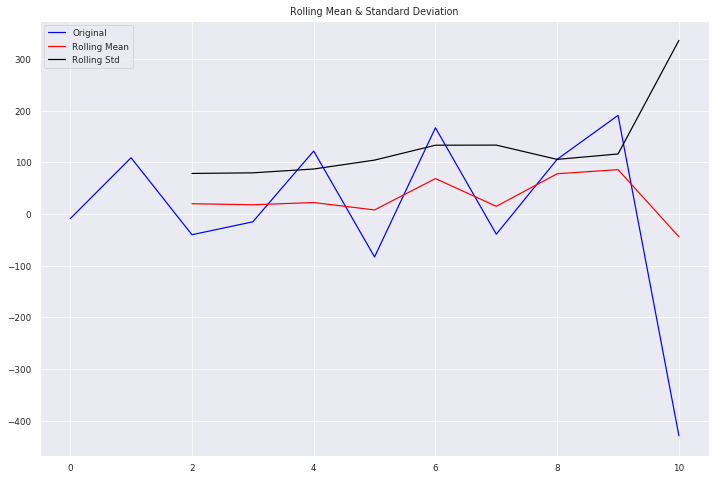

Results of Dickey-Fuller Test:
Test Statistic                -4.944530
p-value                        0.000029
#Lags Used                     1.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
Results of KPSS Test:
Test Statistic           0.402223
p-value                  0.076197
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [31]:
totale_ospedalizzati_lombardia_second_order =totale_ospedalizzati_lombardia - 2*totale_ospedalizzati_lombardia.shift(1) +totale_ospedalizzati_lombardia.shift(2)
test_stationarity(totale_ospedalizzati_lombardia_second_order.dropna(inplace=False))
kpss_test(totale_ospedalizzati_lombardia_second_order.dropna(inplace=False))

Adesso andiamo a determinare attraverso una grid search il modello ARIMA per trovare i migliori valori per parametri p, d, q usando il criterio AIC (Akaike's information criterion),il modello che il valore AIC più basso
è il migliore

aic: 128.52605 | order: (2, 2, 0)


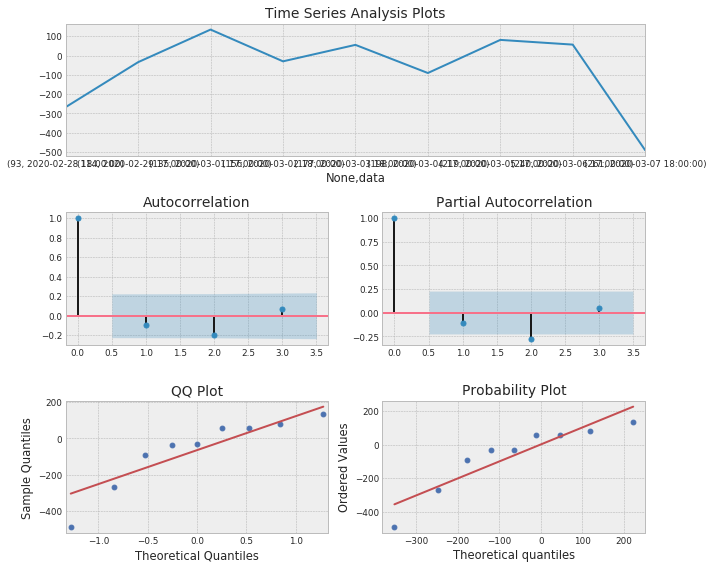

In [32]:
 #Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(8) 
d_rng = range(8) 
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(totale_ospedalizzati_lombardia_second_order.dropna(inplace=False), order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=3)




In [33]:
print(best_mdl.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.totale_ospedalizzati   No. Observations:                    9
Model:                      ARIMA(2, 2, 0)   Log Likelihood                 -61.263
Method:                                mle   S.D. of innovations            178.821
Date:                     Wed, 11 Mar 2020   AIC                            128.526
Time:                             17:46:09   BIC                            129.118
Sample:                                  2   HQIC                           127.249
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ar.L1.D2.totale_ospedalizzati    -1.4502      0.238     -6.086      0.000      -1.917      -0.983
ar.L2.D2.totale_ospedalizzati    -

Guardando l'output del modello i coefficienti associati della parte autoregressiva sono tutti significativi in quanto i p-values associati ai rispettivi test sono inferiori al livello di significatività $\alpha= 0.05$
e per riconferma della validità del modello creato si può guardare anche gli estremi degli intervalli di confidenza per i due parametri lo zero non appartiene a tali intervalli quindi i coefficienti della parte autoregressiva sono significativi.<br>
Anche il criterio BIC (criterio bayesiano) è vicino al valore del AIC, quindi se avessimo scelto il BIC come criterio saremmo arrivati allo stesso modello.